In [3]:
import scipy.integrate as integr            
import numpy as np                          
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
from matplotlib.ticker import FormatStrFormatter
import pylab
import scipy.fft
from matplotlib.animation import FuncAnimation

stat_dpi = 90
rect_pics = (7, 7)
big_pics = (20, 10)
dynamics_pics = (14, 7)

In [38]:
def AJ(x, tau):
    x1 = np.array(x[:-tau])
    x2 = np.array(x[tau:])
    return np.mean(np.abs(x2-x1))


def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size/2:]


def FTREE(
    f = lambda x, r: 1-r*x**4,
    df = lambda x, r:-4*r*x**3,
    x_0 = 0.7, r_range = (0, 2),
    delta = 0.001,
    quality = 100,
    AL_quality = 100,
    show_rlines = False,
    show_xlines = []
):
    fig = plt.figure(facecolor="white", figsize = big_pics, dpi=stat_dpi)
    
    r_points = {}
    AL_points = {}
    AL_r = []
    r_biffurcational = [0]*4
    
    #calculate points
    
    for r in np.arange(r_range[0], r_range[1], delta):
        x = x_0
        r_points[r] = []
        AL_points[r] = 0
        
        #calc stable state and
        for j in range(quality+AL_quality):
            x = f(x, r)
            r_points[r].append(x)
            
            if j>quality:
                AL_points[r] += np.log(abs(df(x, r)))/AL_quality
        if abs(AL_points[r]) < 0.007:
            AL_r.append(r)
            #print(dfft)
        x_0 = x
    
    
    temp = []
    new_AL_r = []
    for i in range(1, len(AL_r)):
        if AL_r[i]-AL_r[i-1]<2*delta:
            temp.append(AL_r[i])
        else:
            new_AL_r.append(temp[-1])
            temp = [AL_r[i]]
            
    
    print(new_AL_r)    
    # draw points
    AL_min = -6
    AL_max = max(AL_points.values())
    print(AL_min)
    for r in r_points:
        points_num = len(r_points[r])
        plt.plot([r]*points_num, r_points[r], 'r+', ms=1, alpha=0.2)
        plt.plot(r, (AL_points[r]-AL_min)/(AL_max-AL_min), 'b+', ms=1)
    
    plt.vlines(new_AL_r, -1, 1.0)
            
    fig = plt.figure(facecolor="white", figsize = big_pics, dpi=stat_dpi)
    
    for r in r_points:
        plt.grid(True)
        plt.plot(r, AL_points[r], 'b+', ms=1)
    plt.hlines(0, r_range[0], r_range[1])
    
#     fig = plt.figure(facecolor="white", figsize = big_pics, dpi=stat_dpi)
#     ax = plt.axes(xlim=(0, 1), ylim=(0, 400))
#     lines = []
#     lines.append(ax.plot([], [], color="black")[0])
#     for i in range(9):
#         lines.append(ax.plot([], [], alpha=(1-i/10)/5, color="black")[0])
    
#     dfft_lib = []
#     for r in r_points:
#         temp = np.array(r_points[r])
#         dfft = scipy.fft.fft(temp)
#         dfft_freq=np.linspace(0.0, 1.0, len(dfft))
#         dfft_lib.append([dfft_freq, dfft])
#     dfft_lib = dfft_lib[1300:]
#     dfft_lib = [dfft_lib[i] for i in range(len(dfft_lib)) if i%1==0]
#     print(len(dfft_lib))
    
#     def init_1():
#         lines[0].set_data([], [])
#         return lines
    
#     def animate_1(i):
#         x = dfft_lib[i][0]
#         y = np.abs(dfft_lib[i][1])
#         lines[0].set_data(x, y)
#         if i>10:
#             for j in range(1, 10):
#                 lines[j].set_data(dfft_lib[i-j][0], np.abs(dfft_lib[i-j][1]))
        
#         return lines
    
#     anim = FuncAnimation(fig, animate_1, init_func=init_1,
#                                frames=len(dfft_lib), interval=50, blit=True)   
#     anim.save('DFFT3.gif', writer='imagemagick')
    
#     print("loaded dfft gif")
    
    
    for r in new_AL_r:
        fig = plt.figure(facecolor="white", figsize = big_pics, dpi=stat_dpi)
        temp = np.array(r_points[r])
        dfft = scipy.fft.fft(temp)
        dfft_freq=np.linspace(0.0, 1.0, len(dfft))
        AJres = [AJ(temp, i) for i in np.arange(1, 20)]
        AJres_x = np.arange(1, 20)
        
        axfft = fig.add_subplot()
        axfft.set_title(f"При бифуркационном значении {r=}\nDFFT")
        axfft.plot(dfft_freq, np.abs(dfft))
        plt.show()
        
        fig = plt.figure(facecolor="white", figsize = big_pics, dpi=stat_dpi)
        axAJ = fig.add_subplot()
        plt.xticks(AJres_x)
        axAJ.grid(True)
        axAJ.set_title(f"Функция Колмогорова")
        axAJ.plot(AJres_x, AJres)
        plt.show()
        
        fig = plt.figure(facecolor="white", figsize = big_pics, dpi=stat_dpi)
        axACORR = fig.add_subplot()
        axAJ.set_title(f"Автокорреляционная функция")
        axACORR.acorr(temp, usevlines=True, maxlags=AJres_x[-1])
        plt.show()

        

    

C:\Temp/ipykernel_10976/2485266185.py:42: RuntimeWarning: divide by zero encountered in log
  AL_points[r] += np.log(abs(df(x, r)))/AL_quality


[0.491, 1.405, 1.568, 1.591, 1.615, 1.6260000000000001, 1.6400000000000001, 1.686, 1.743, 1.797]
-6


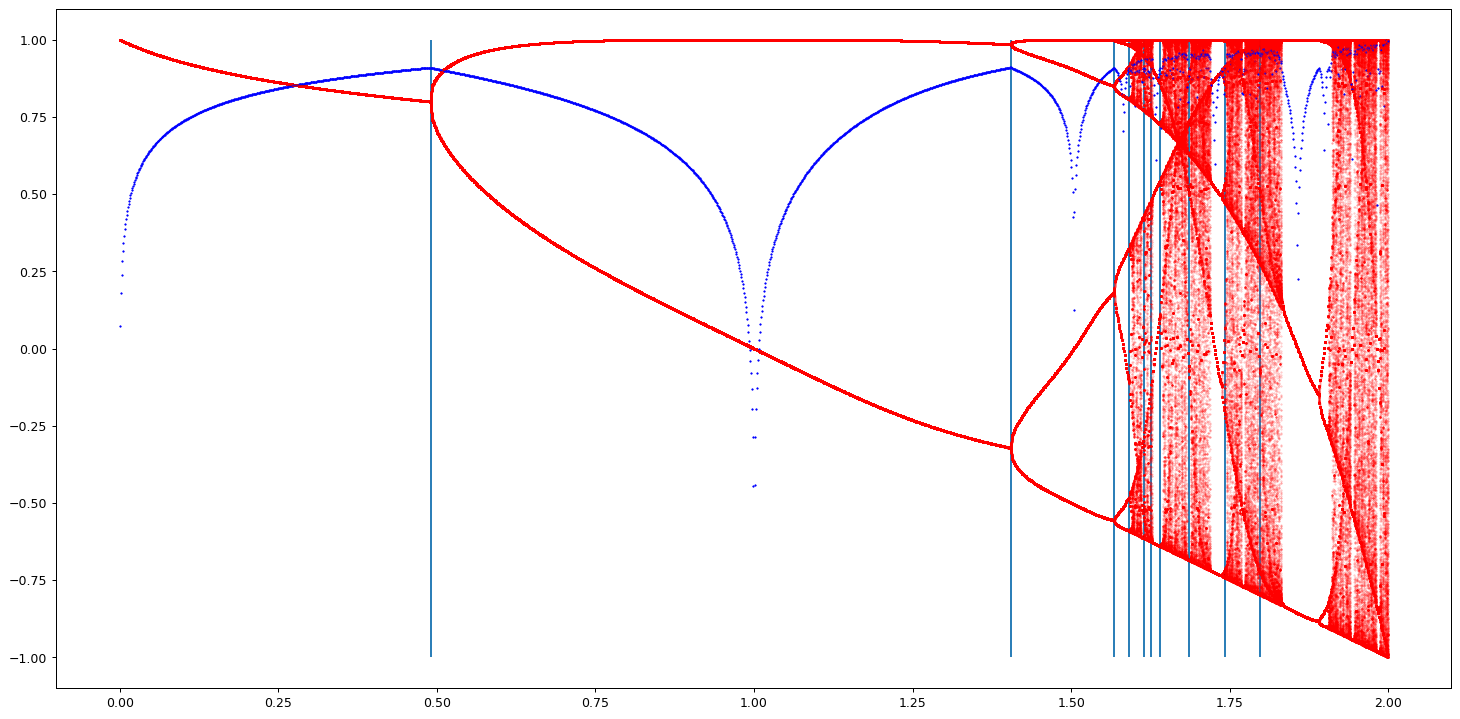

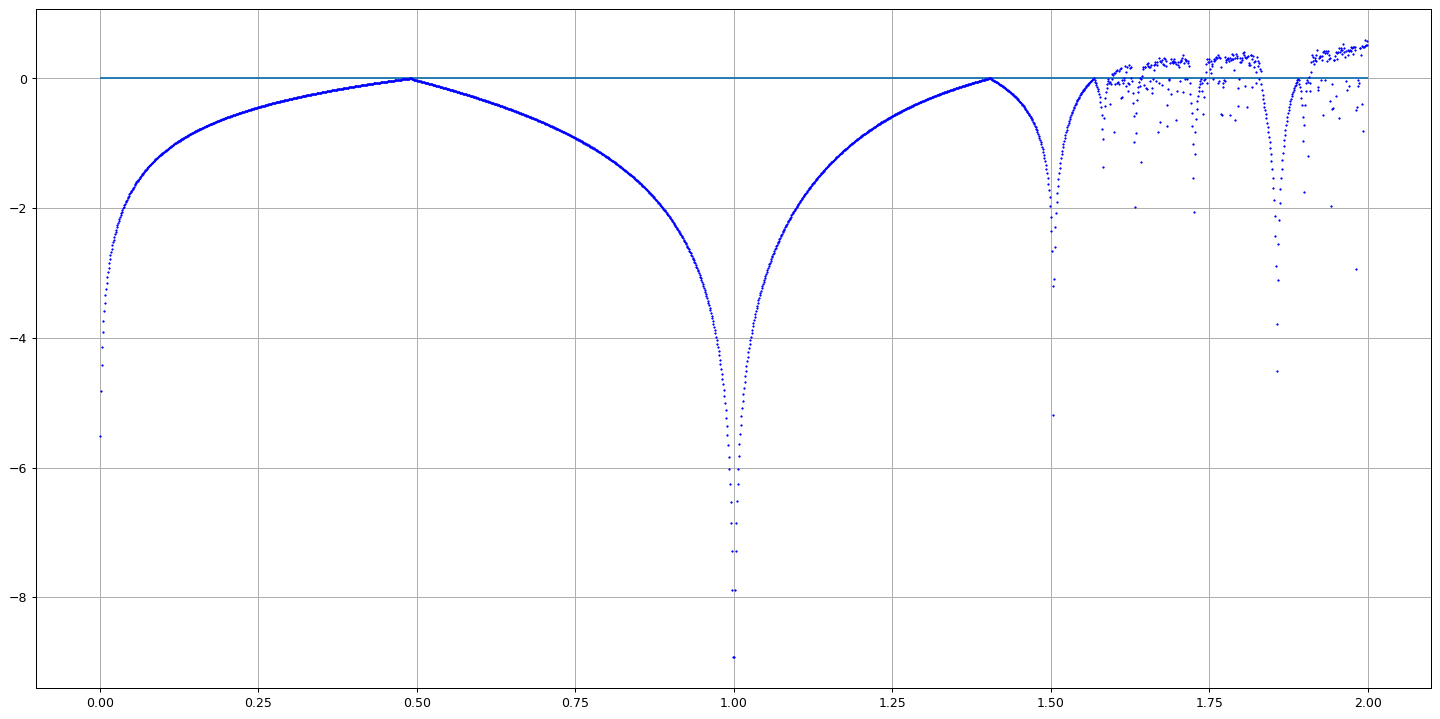

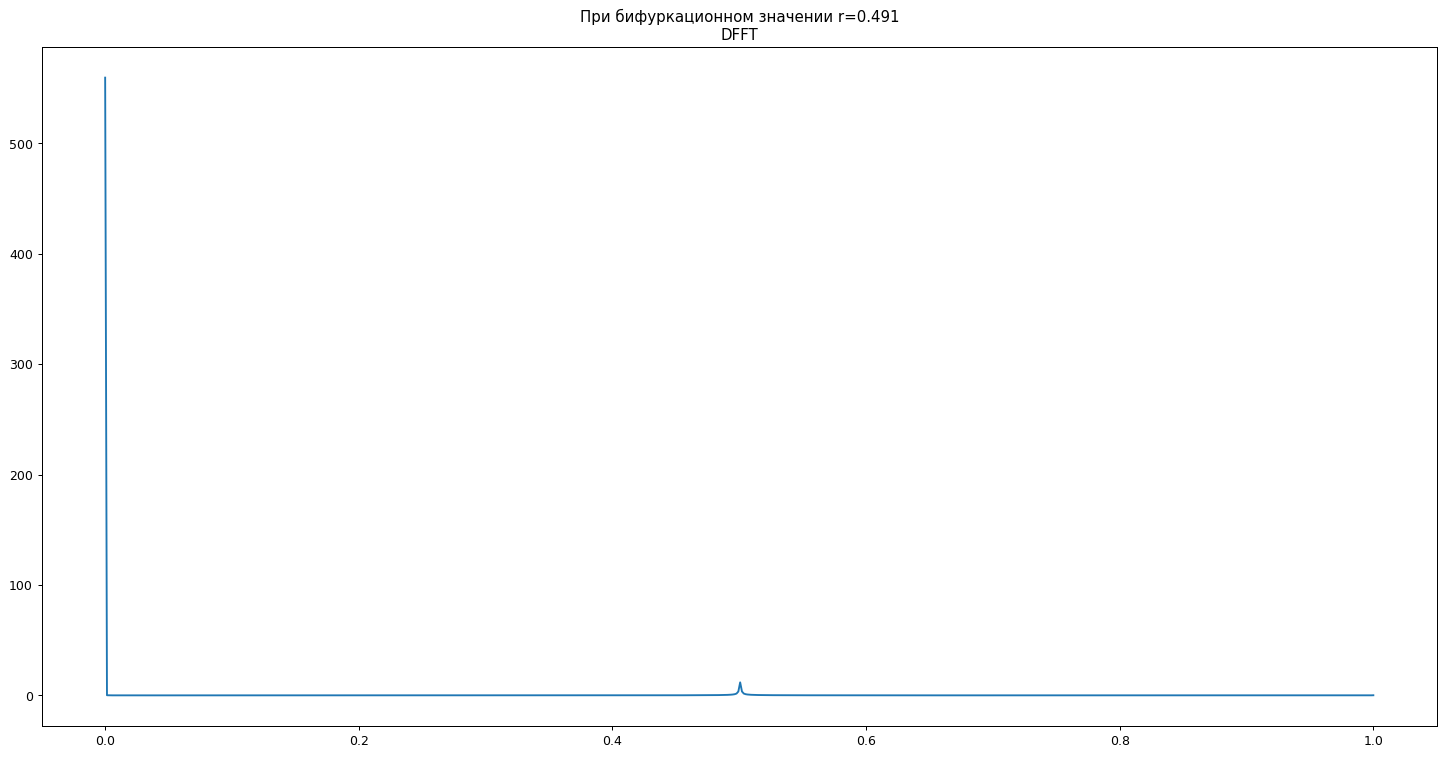

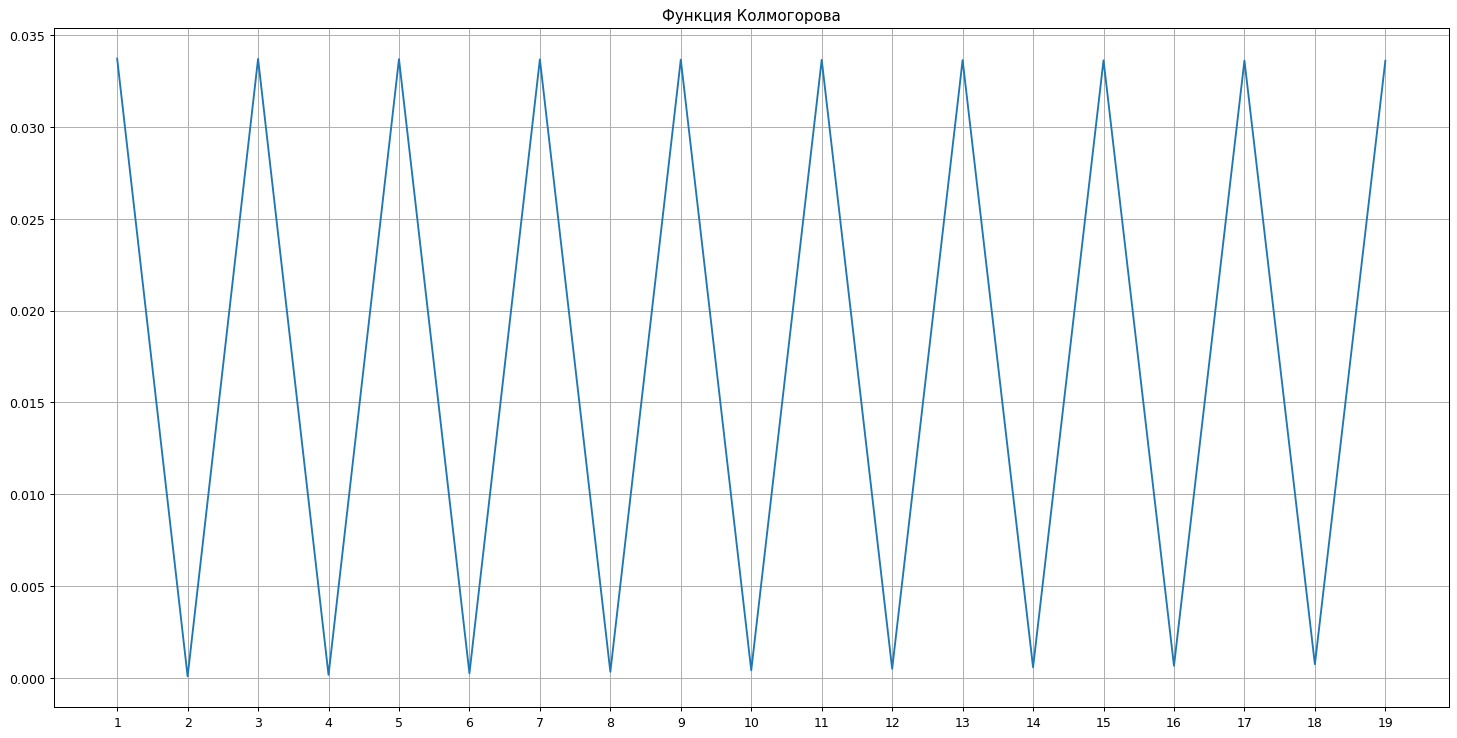

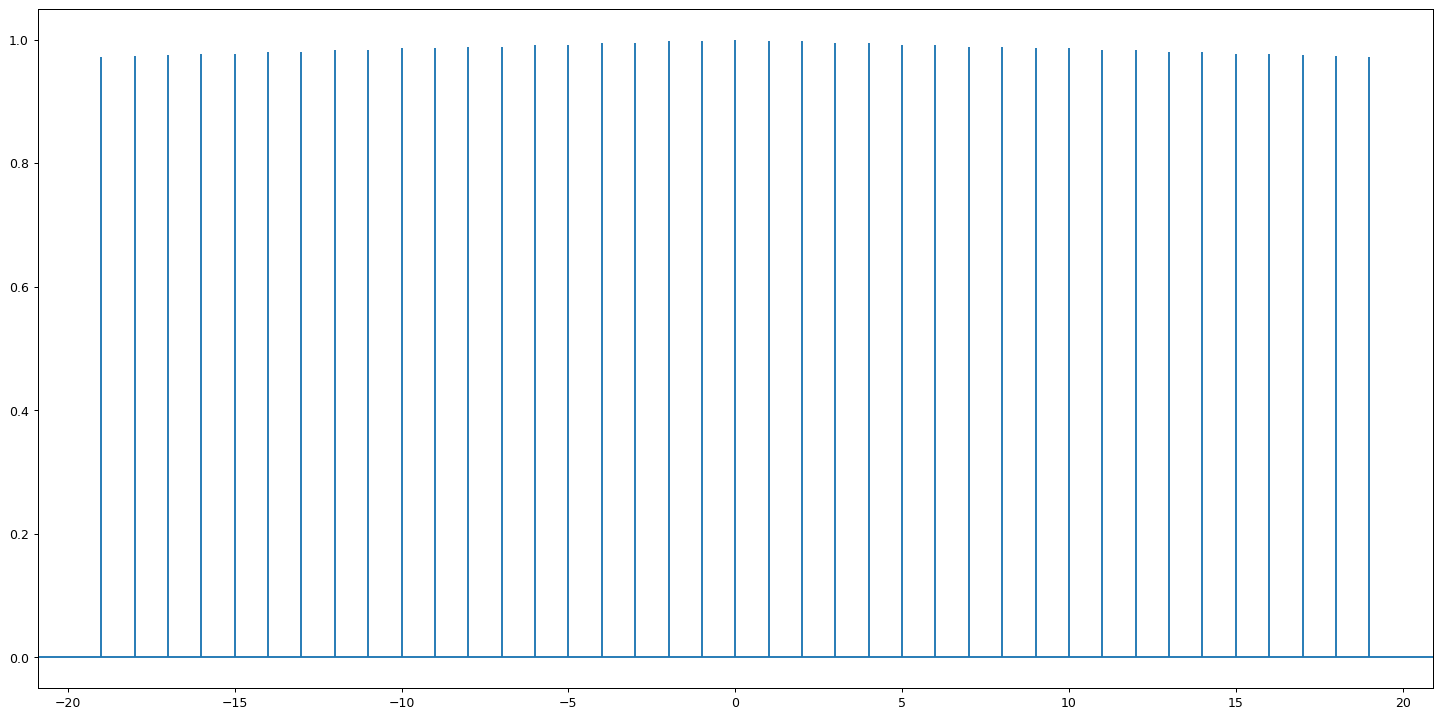

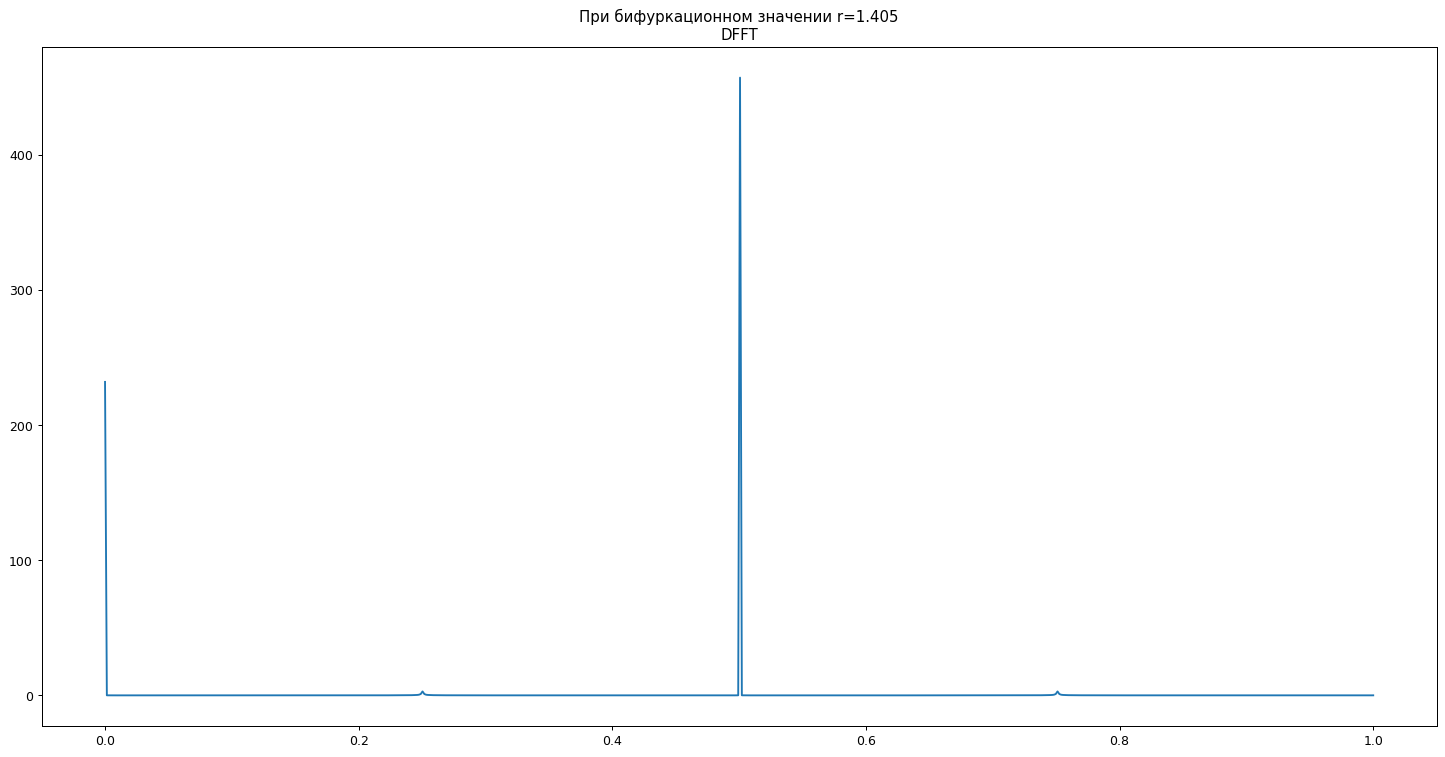

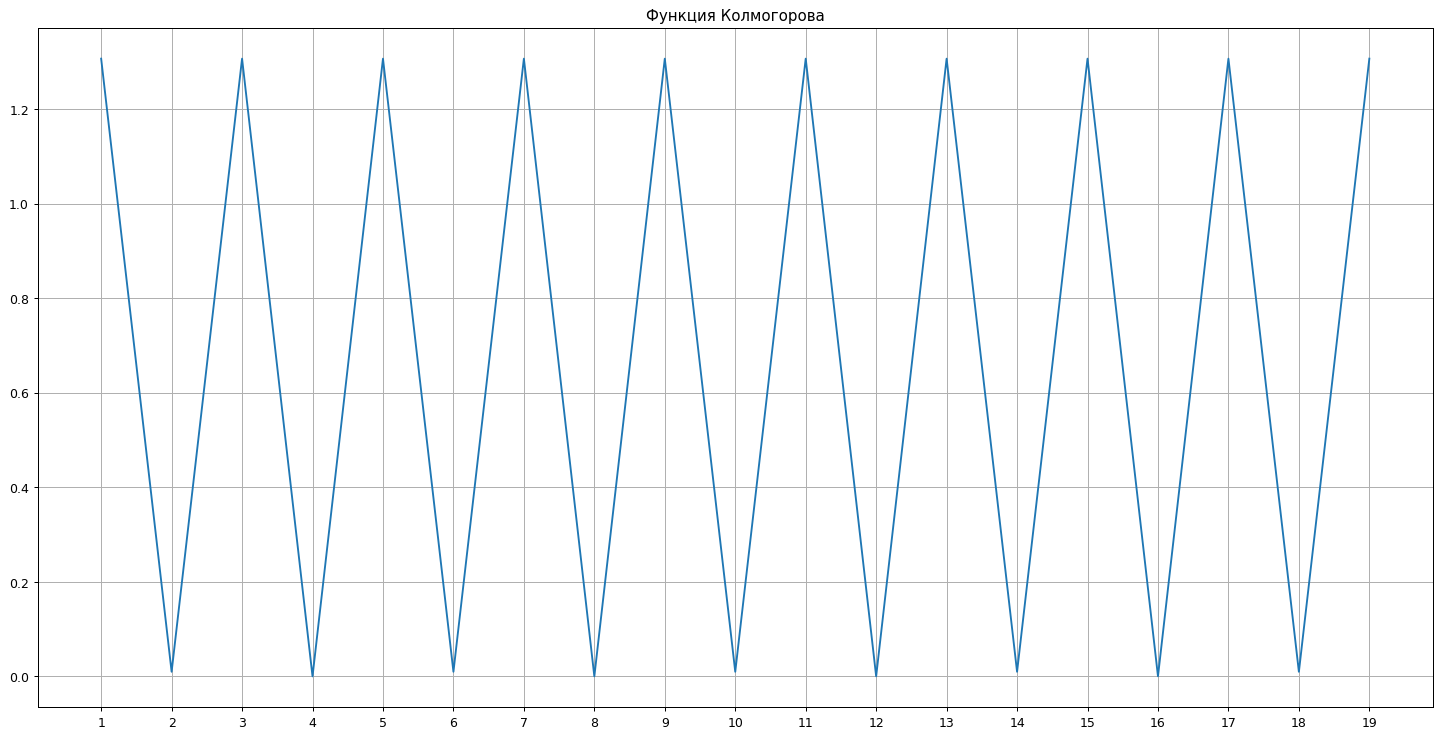

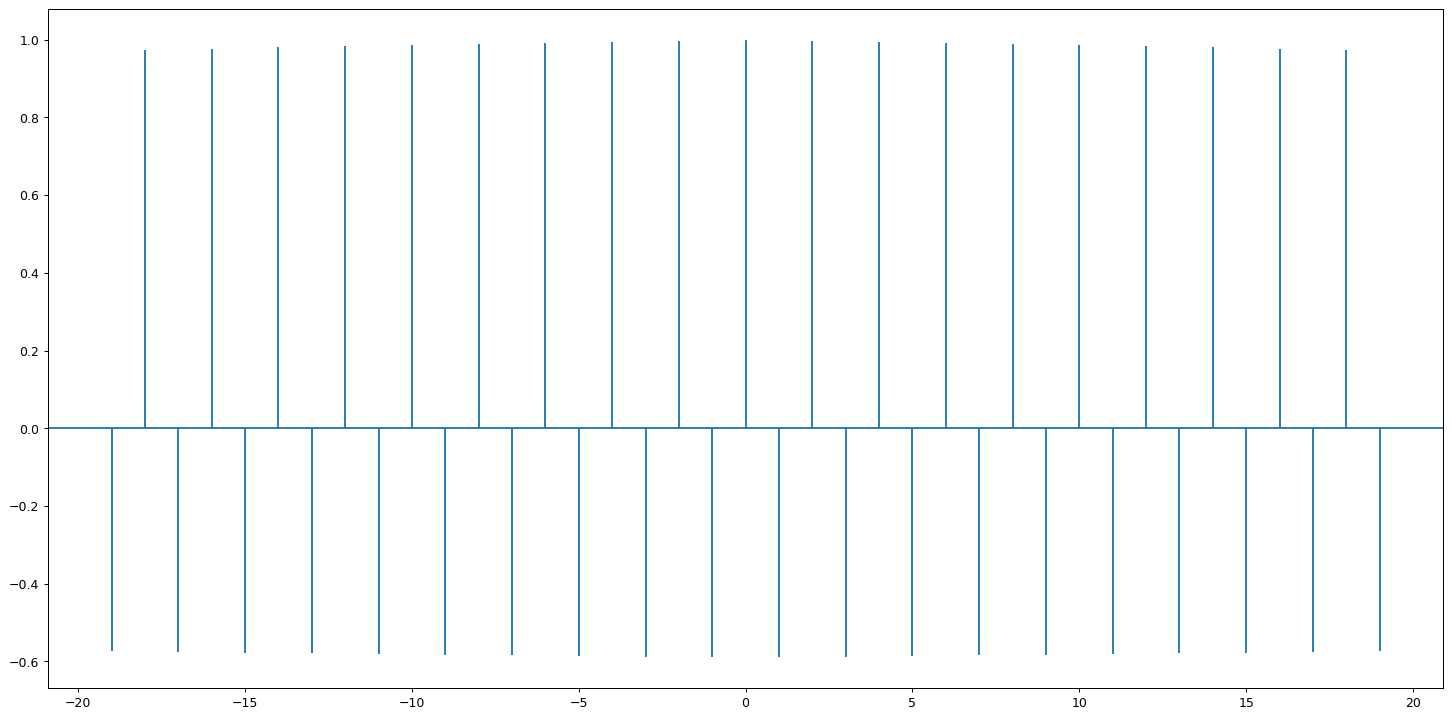

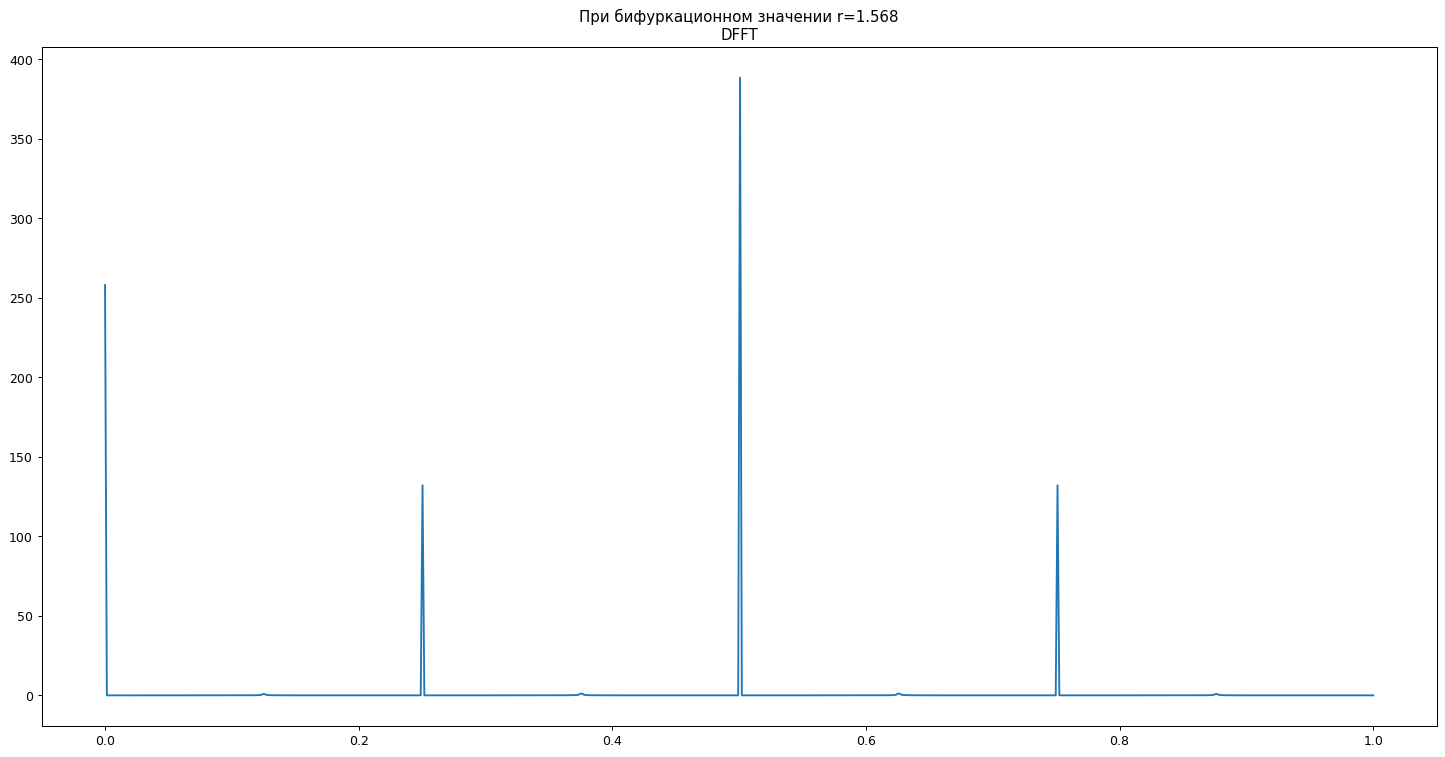

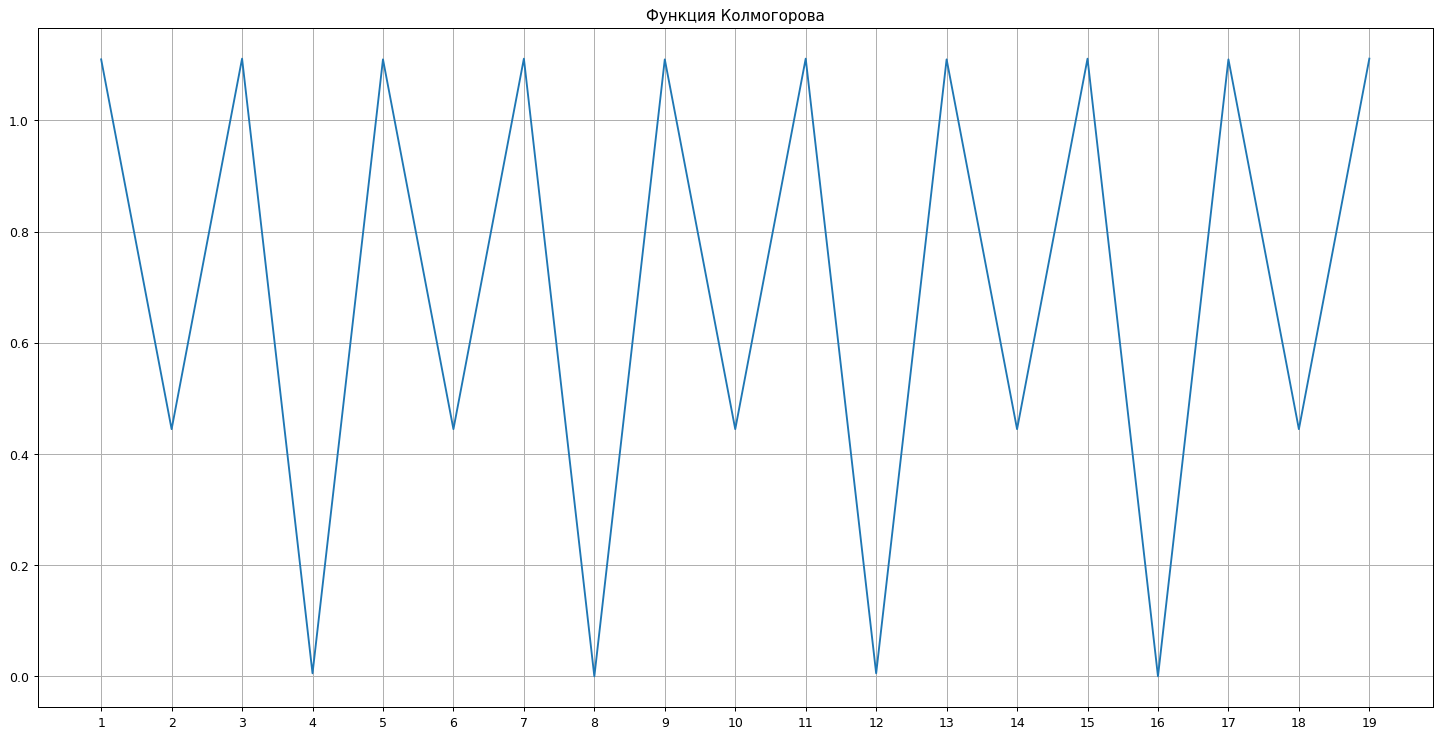

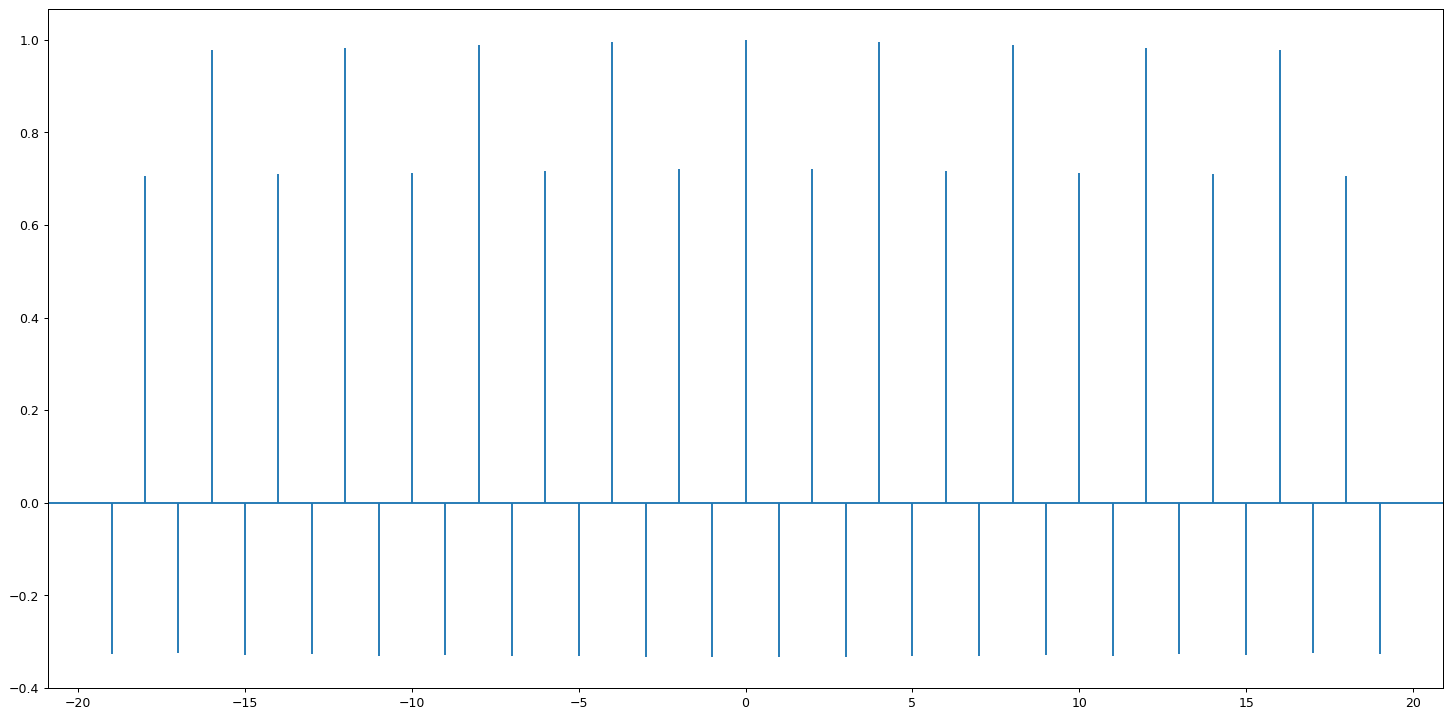

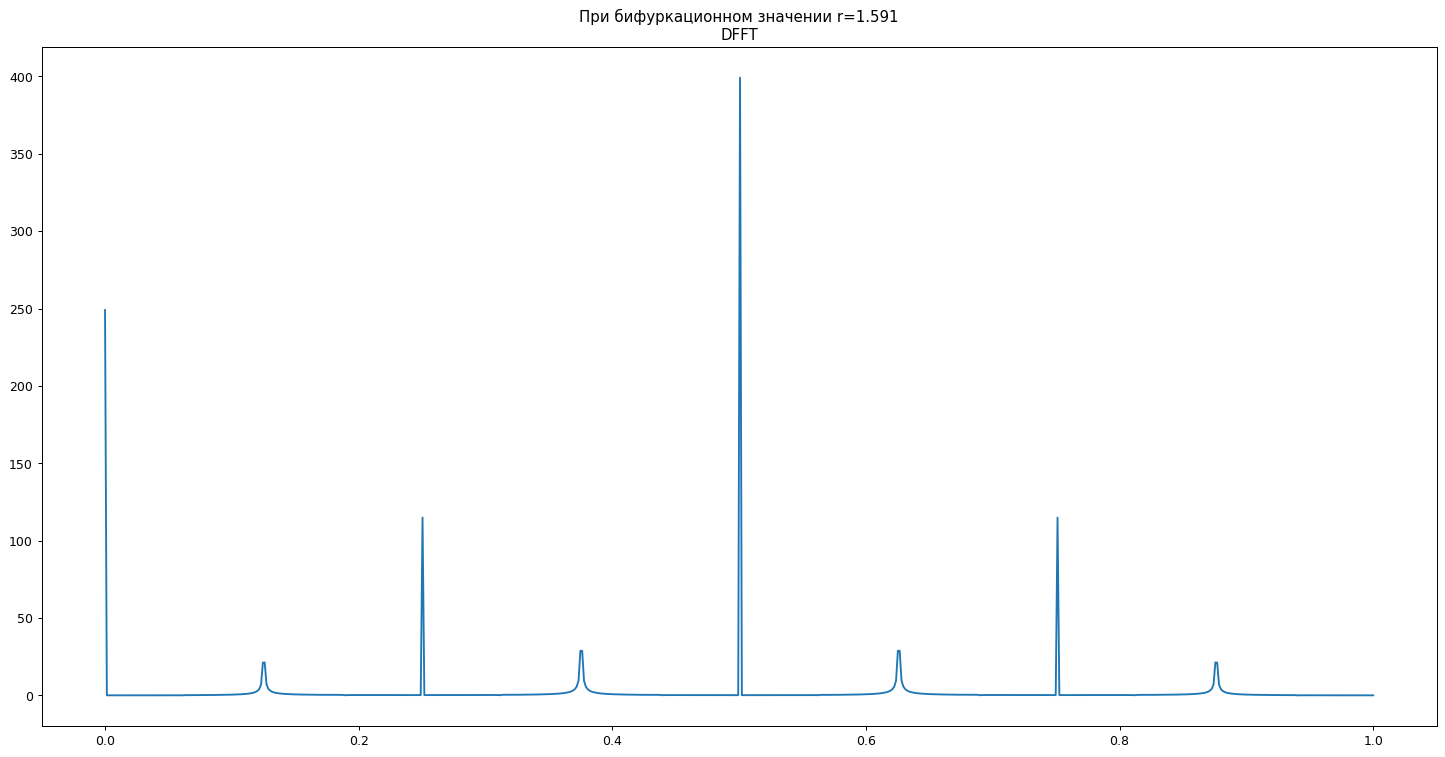

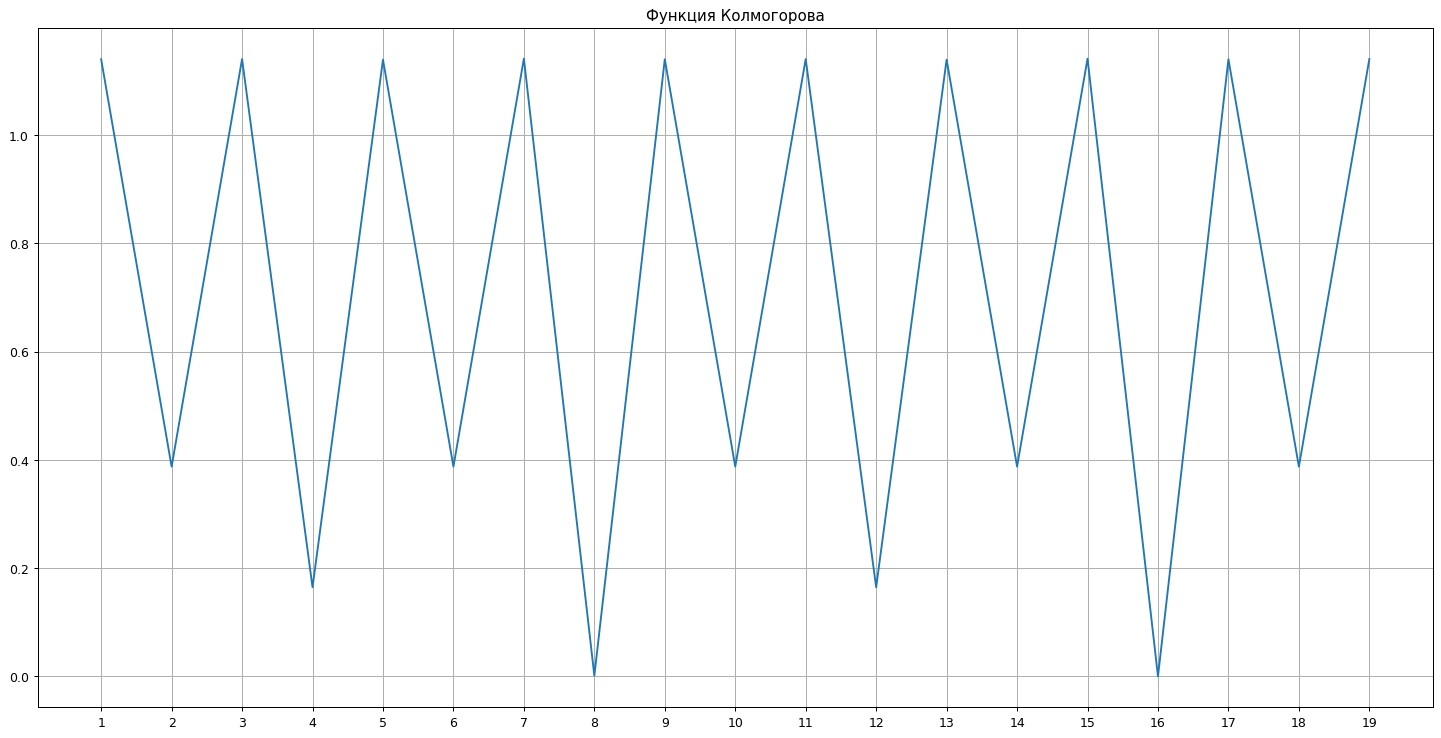

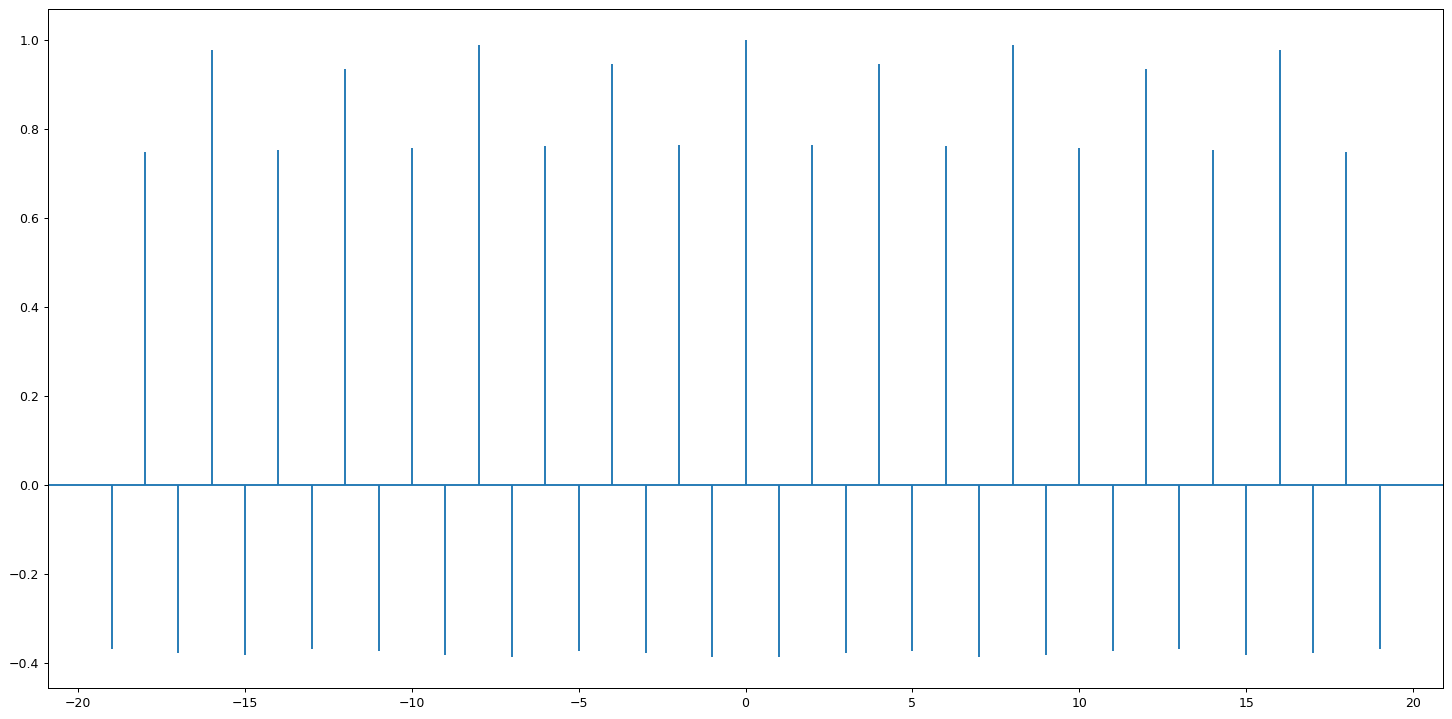

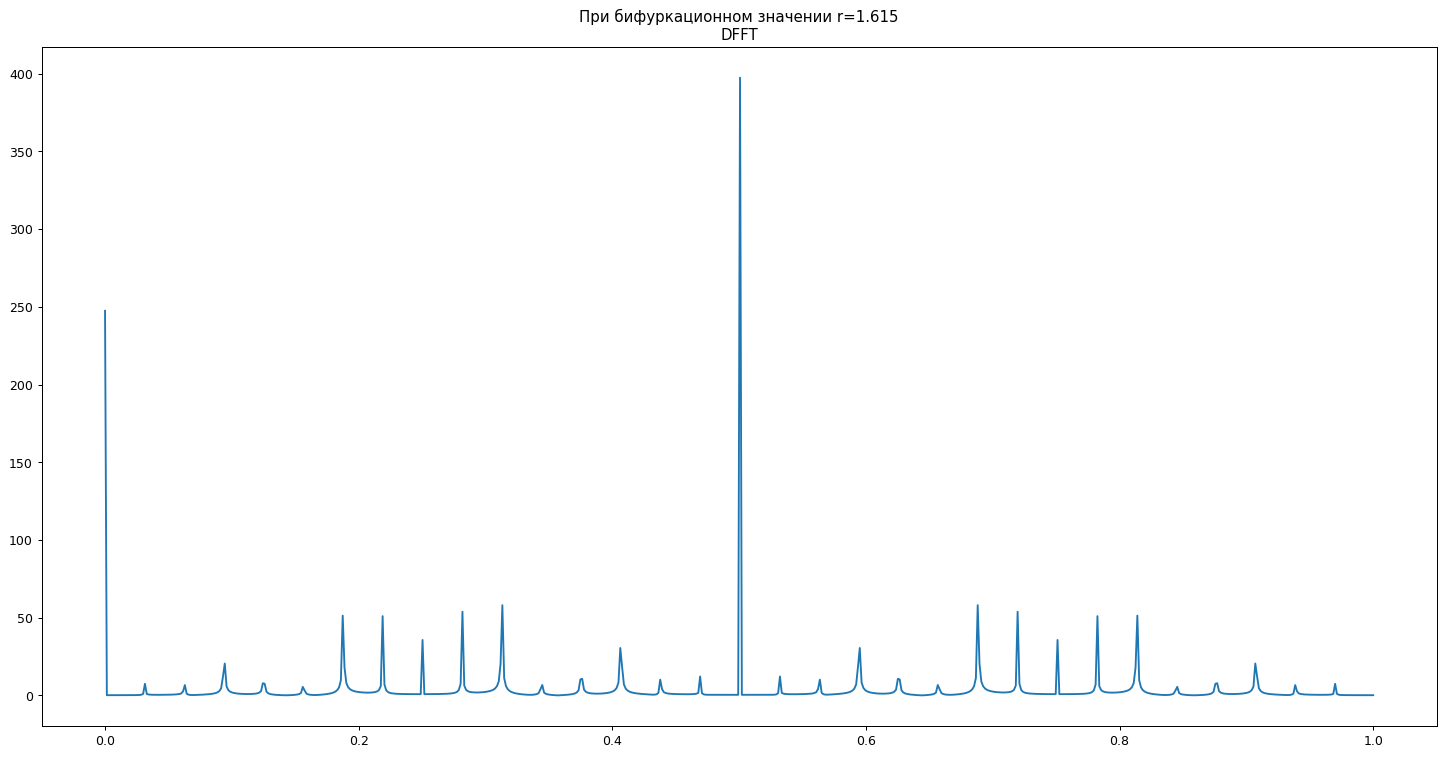

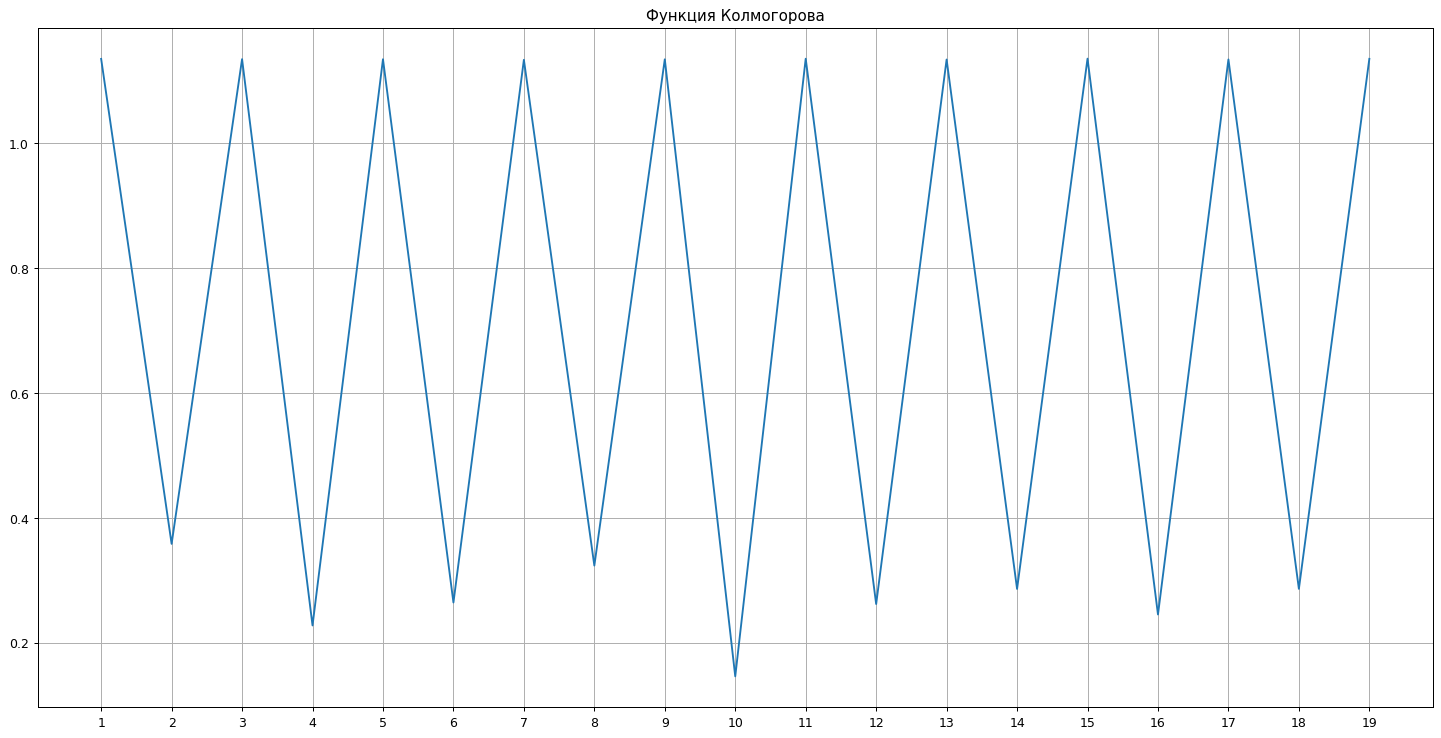

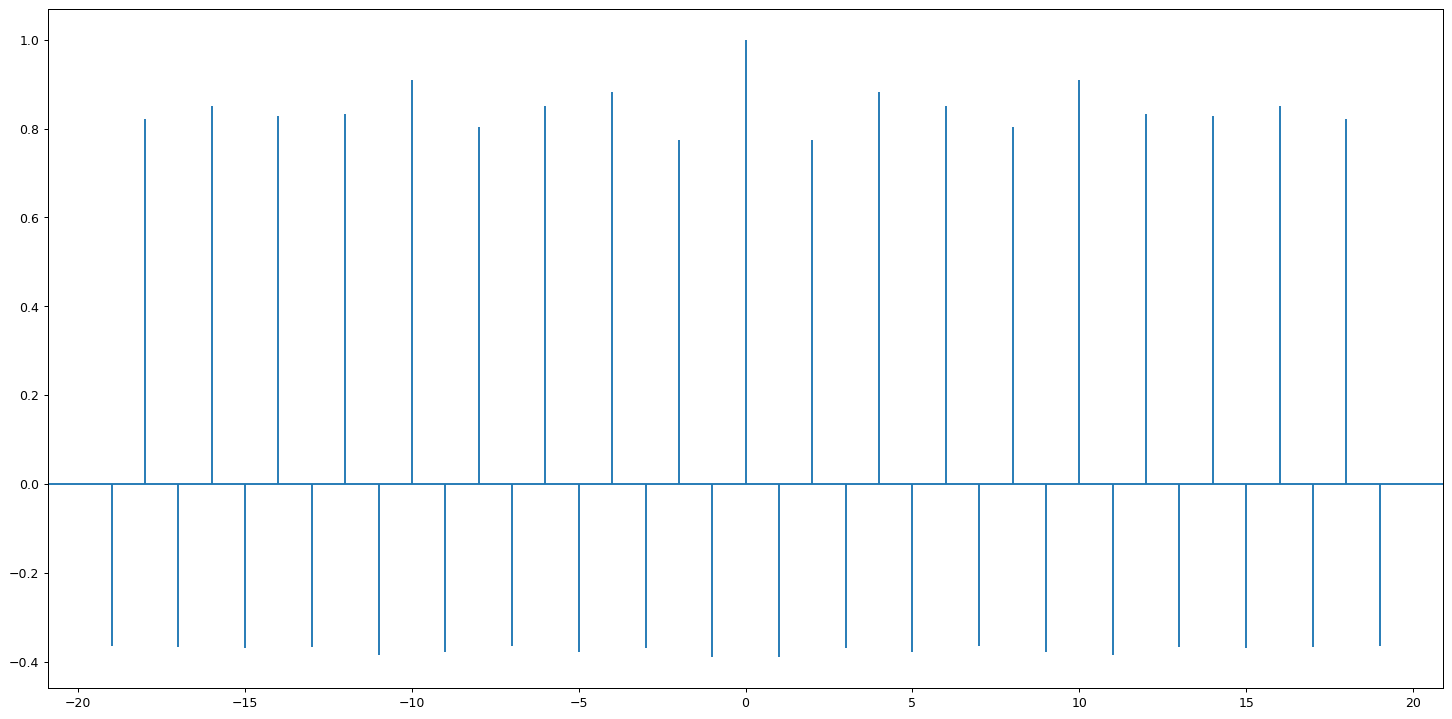

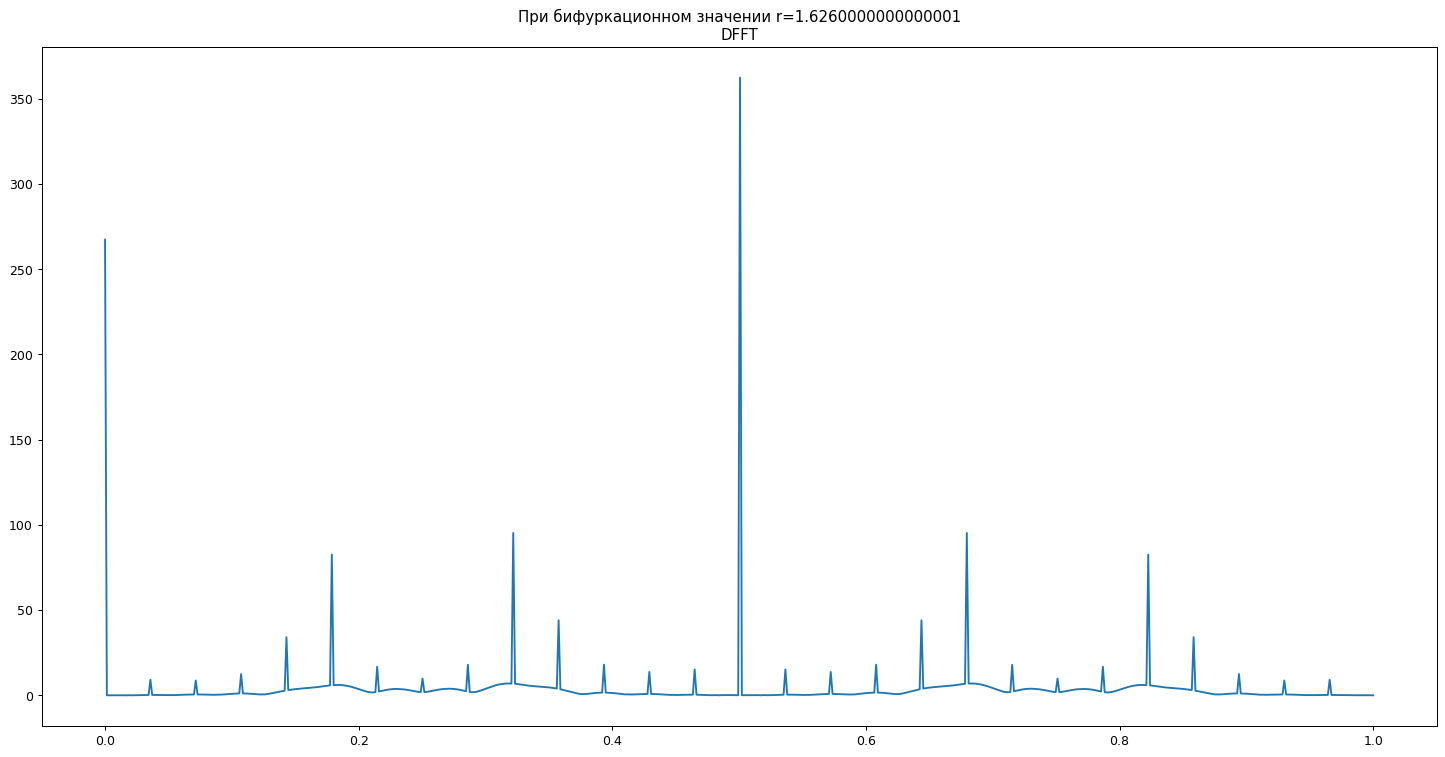

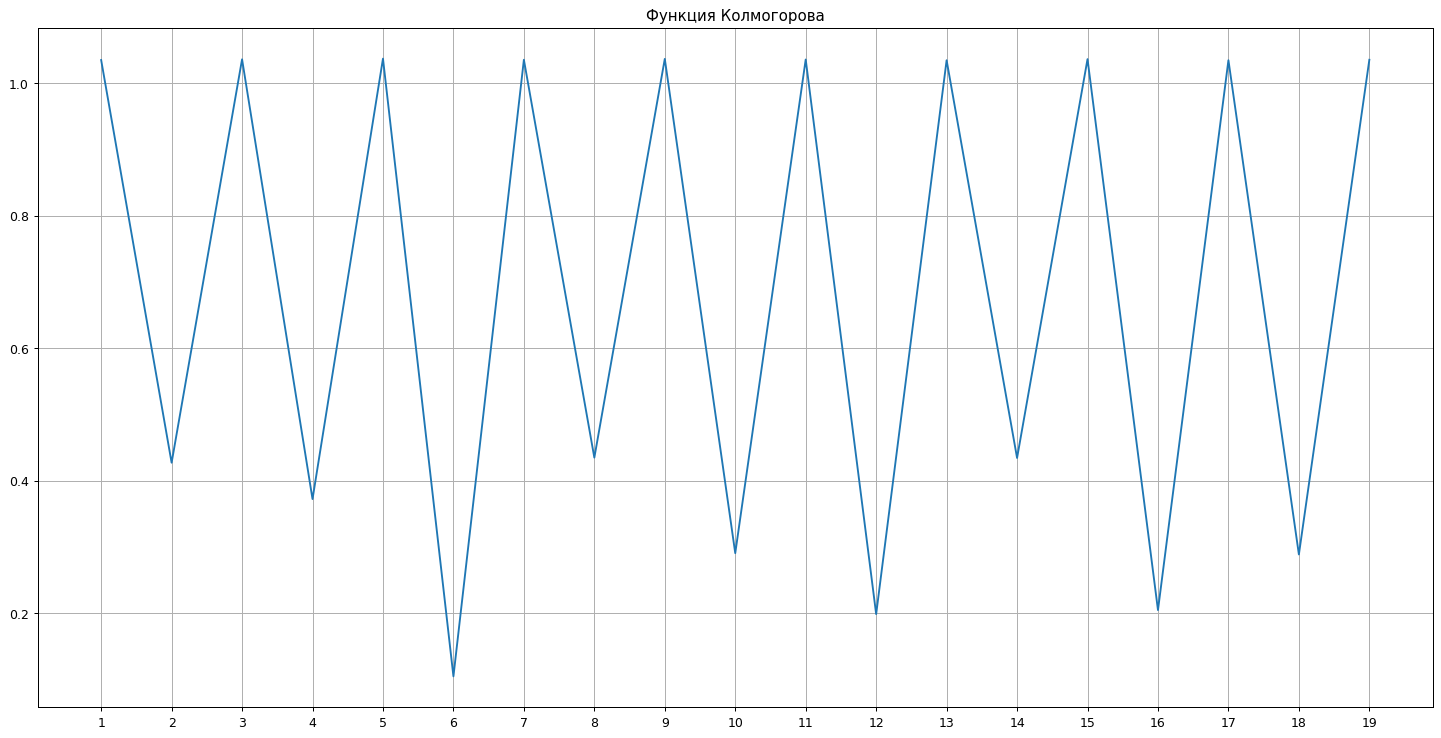

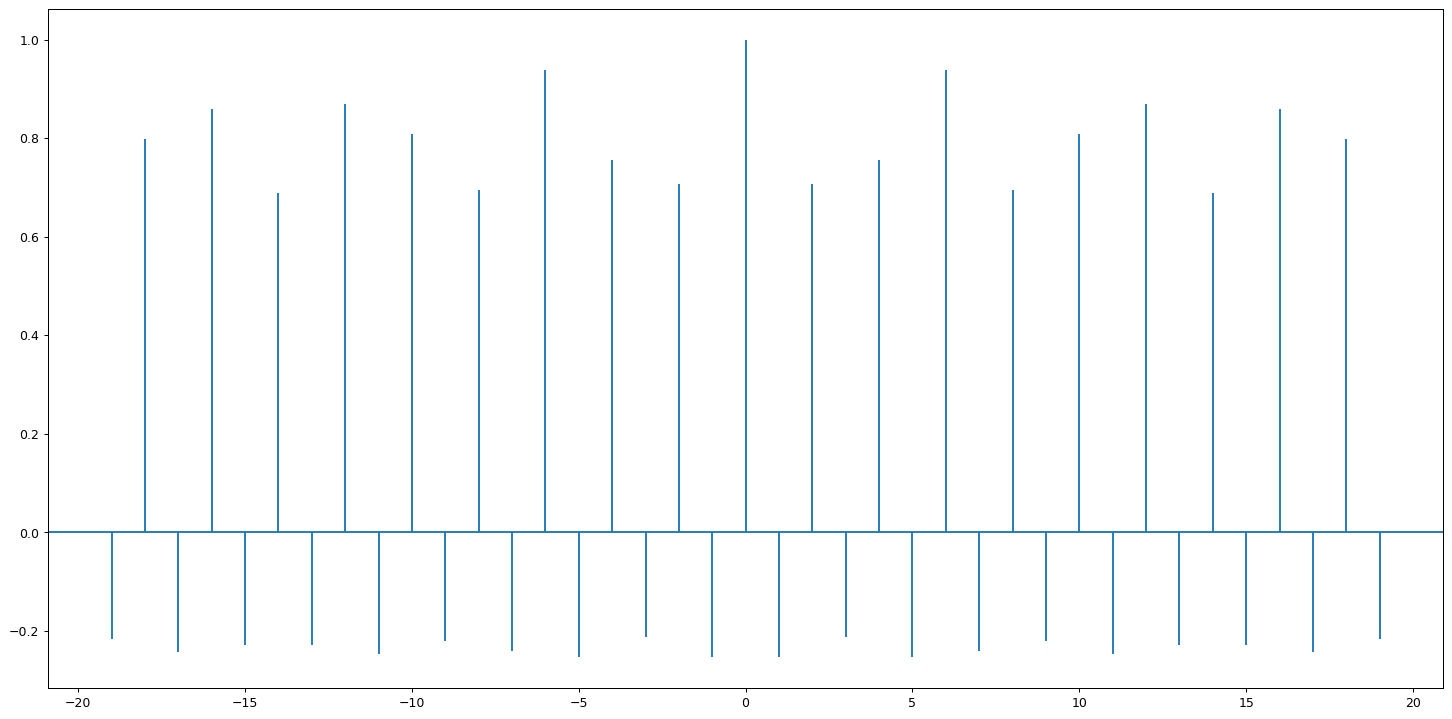

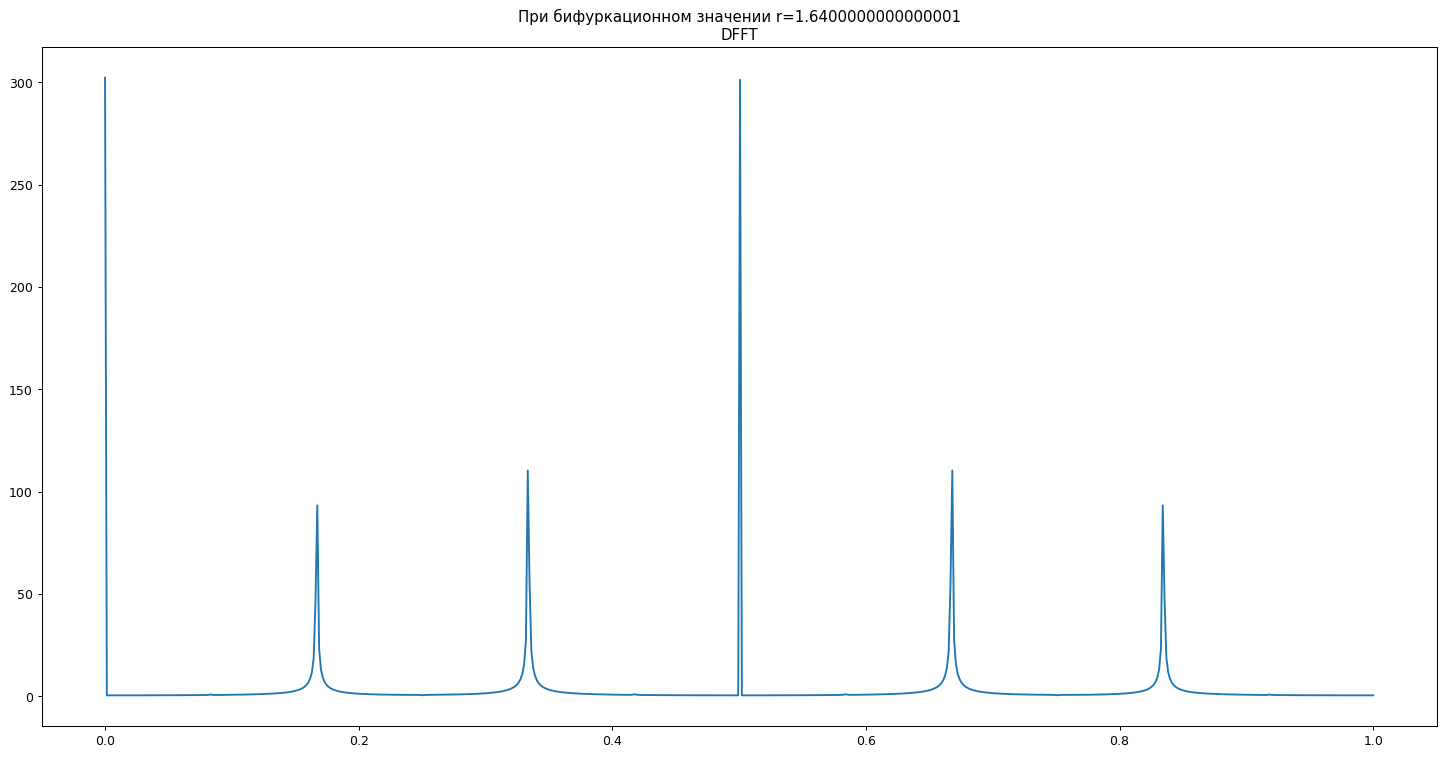

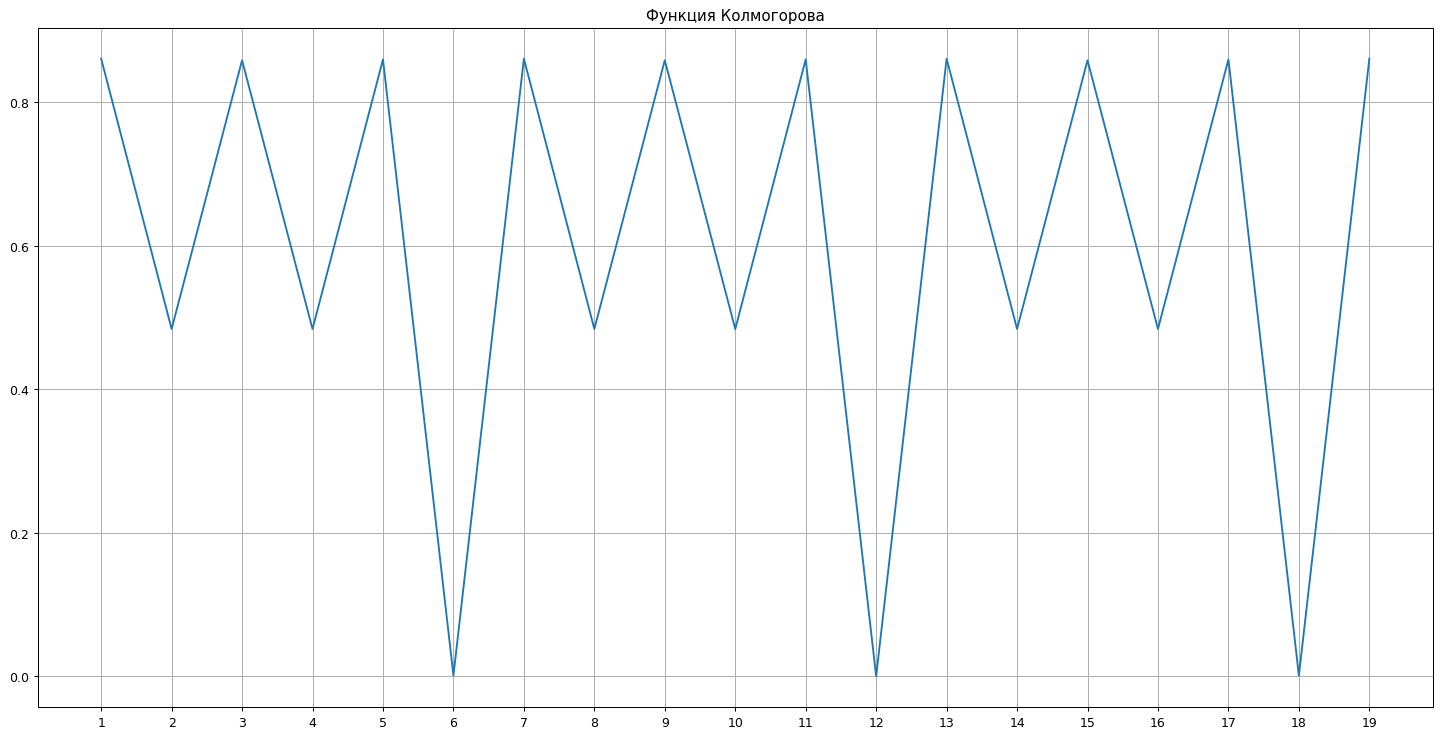

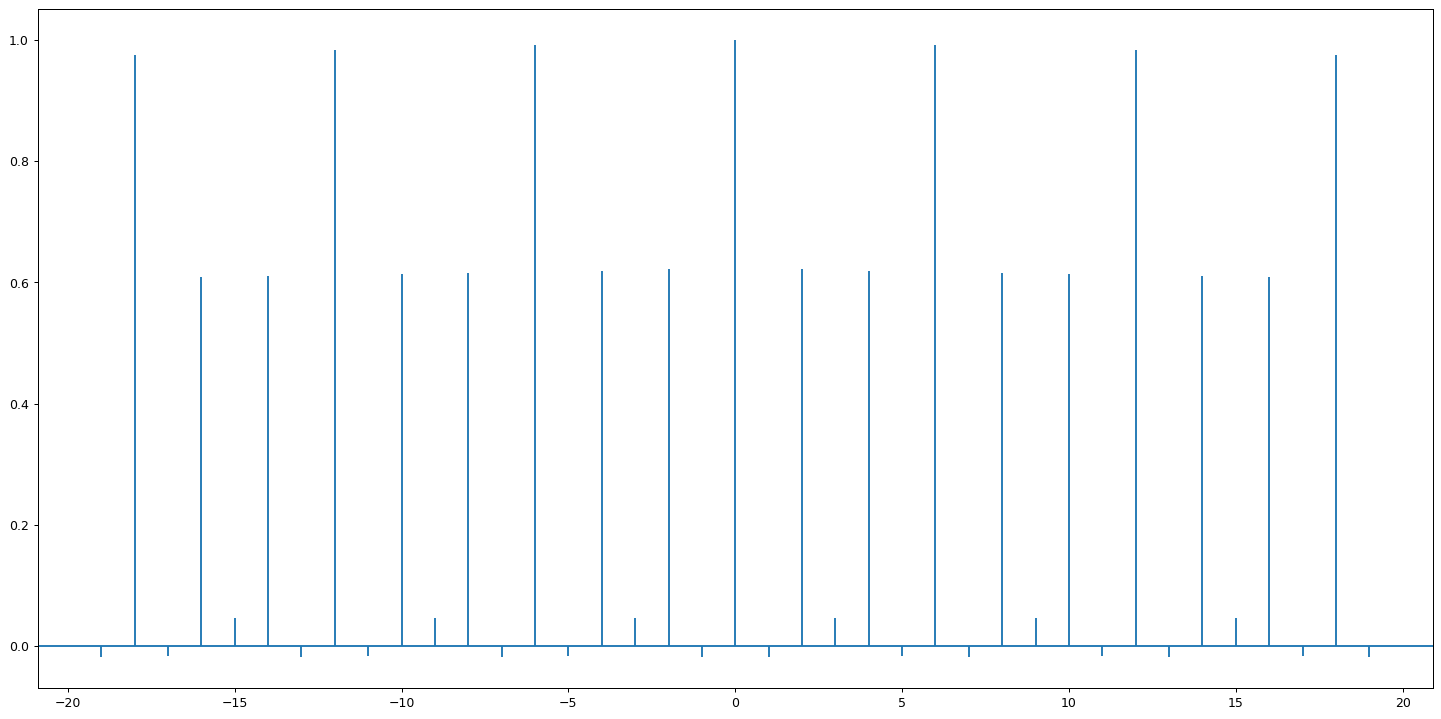

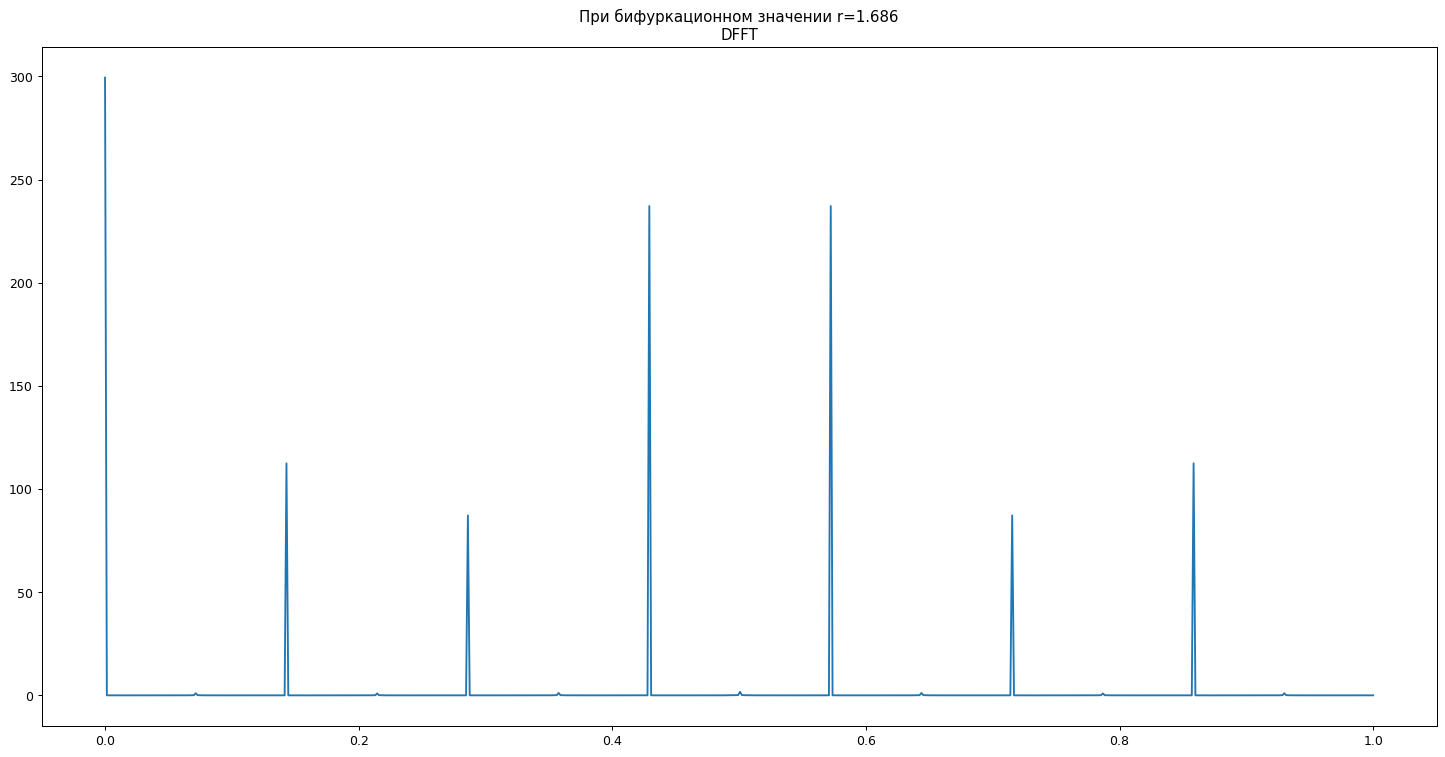

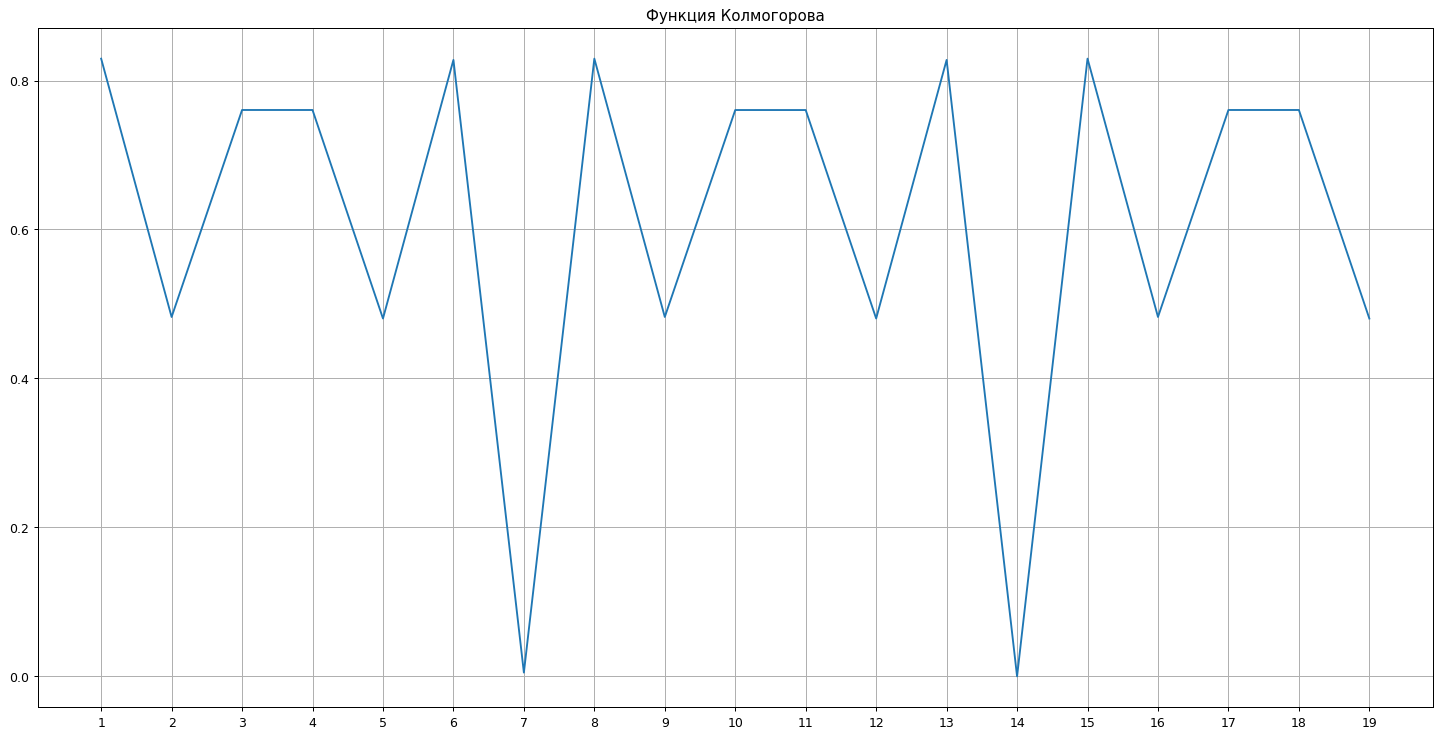

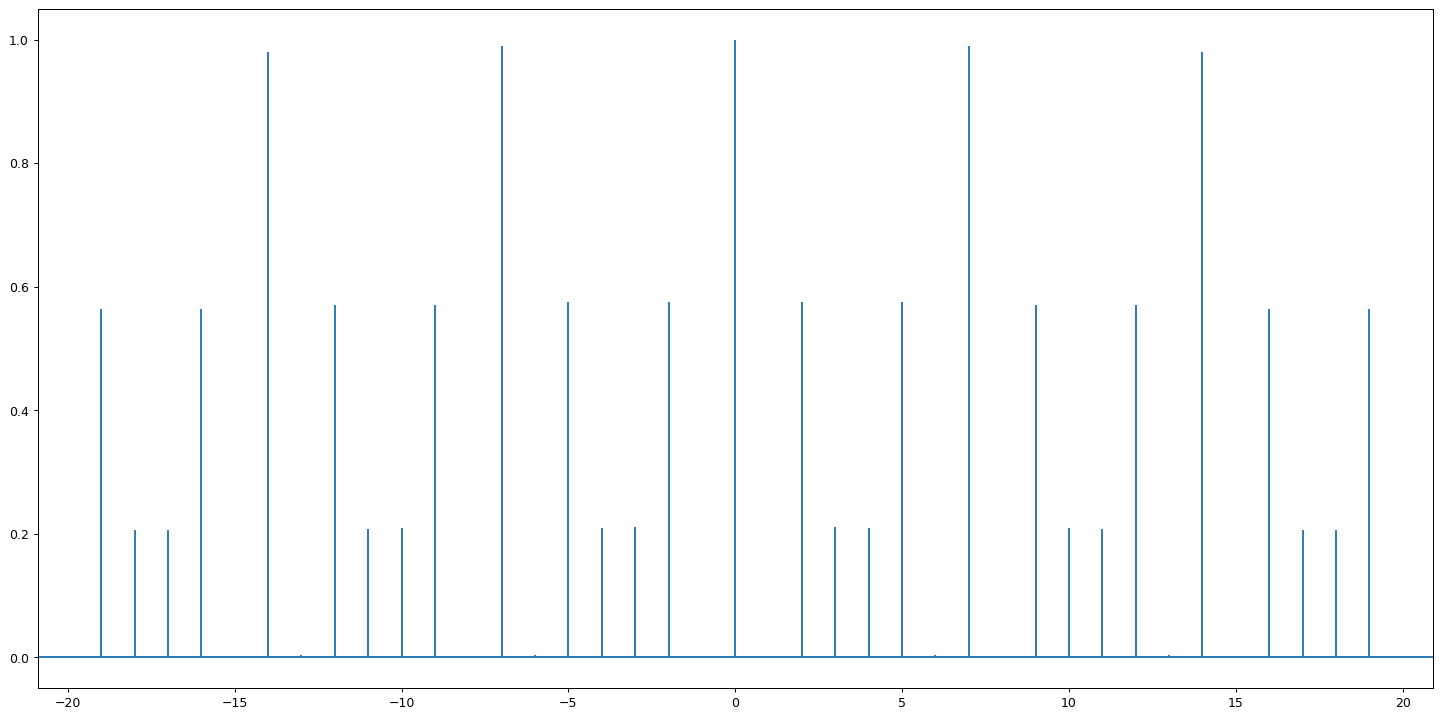

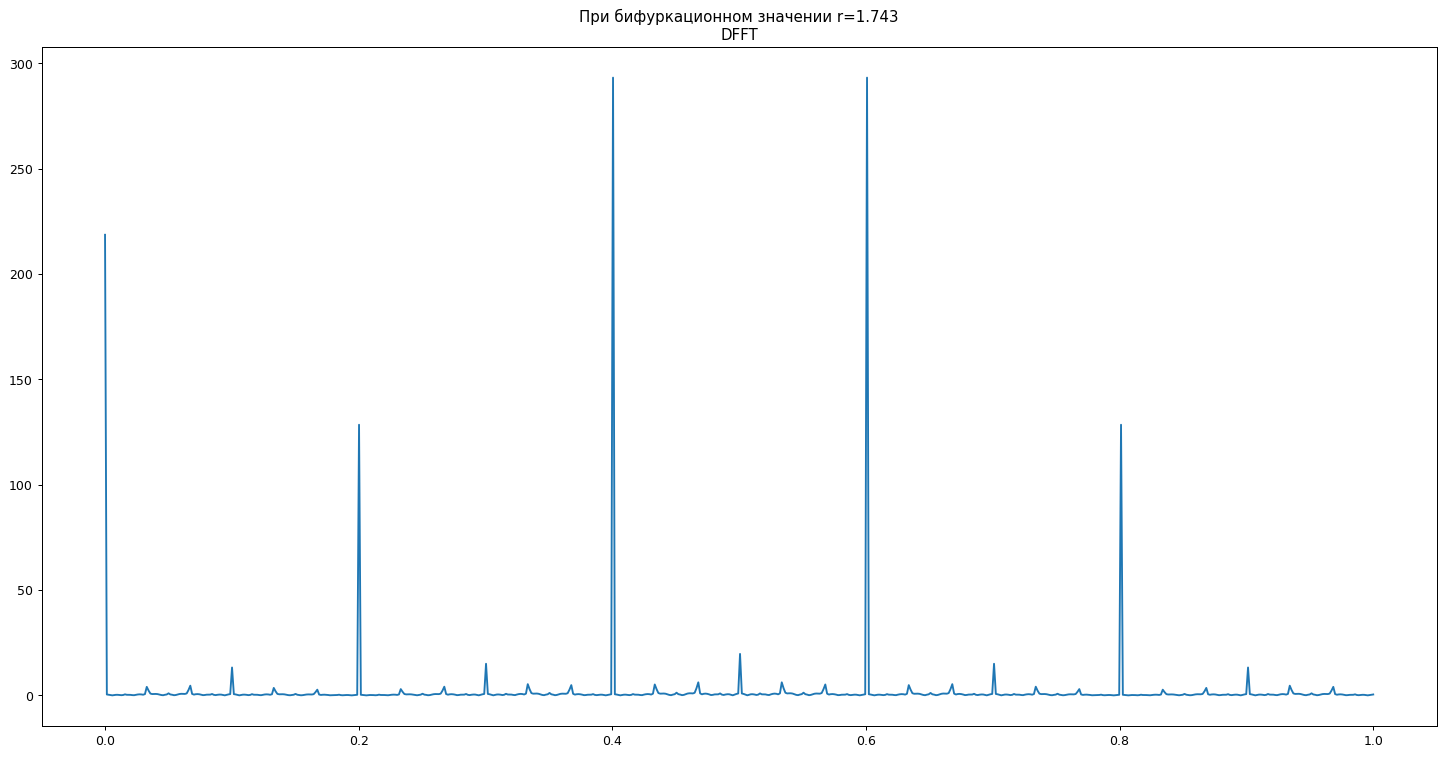

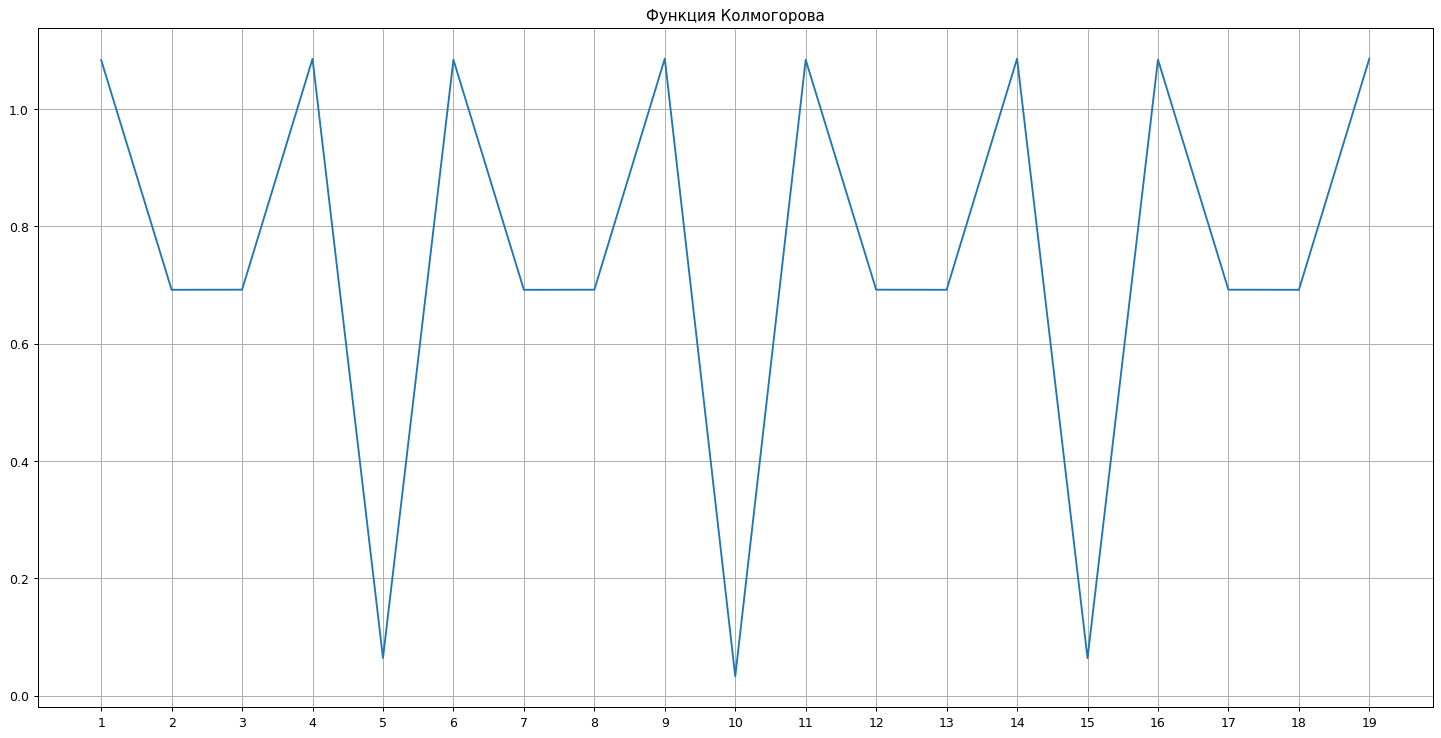

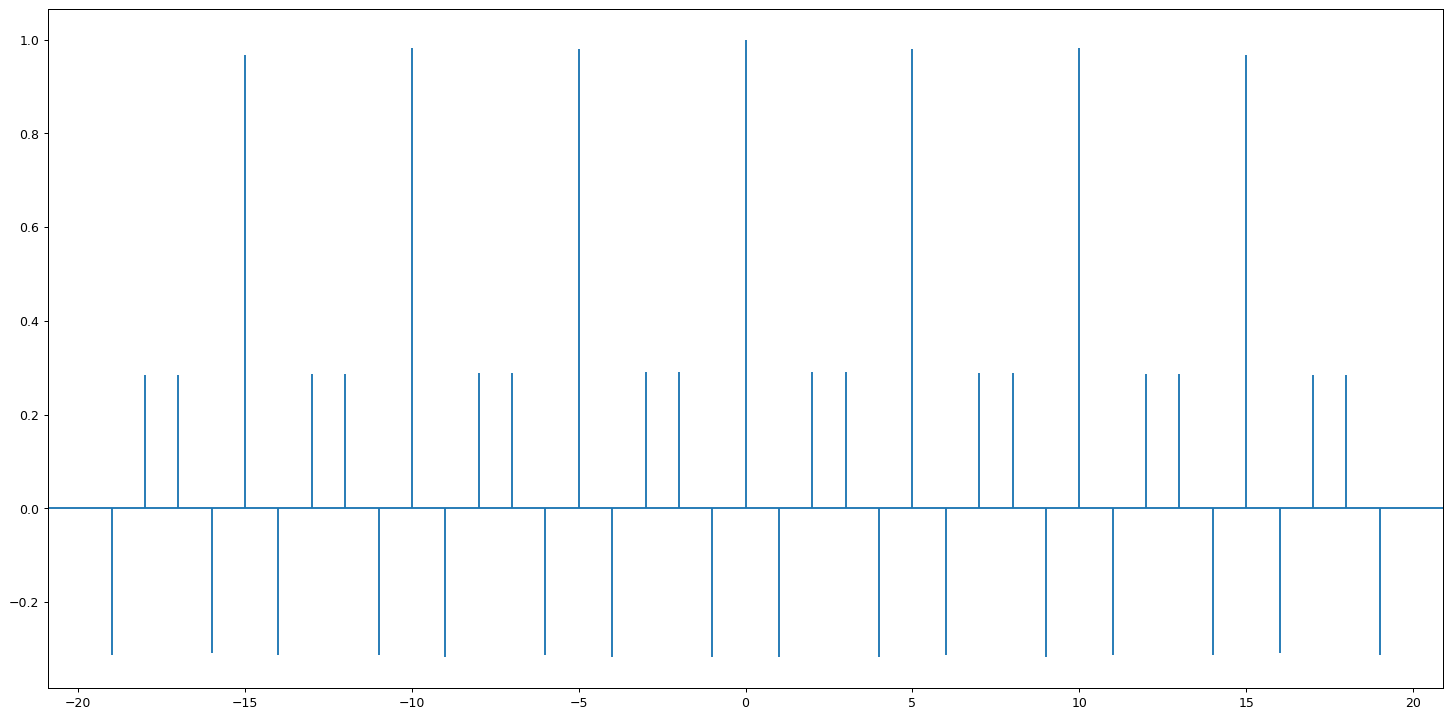

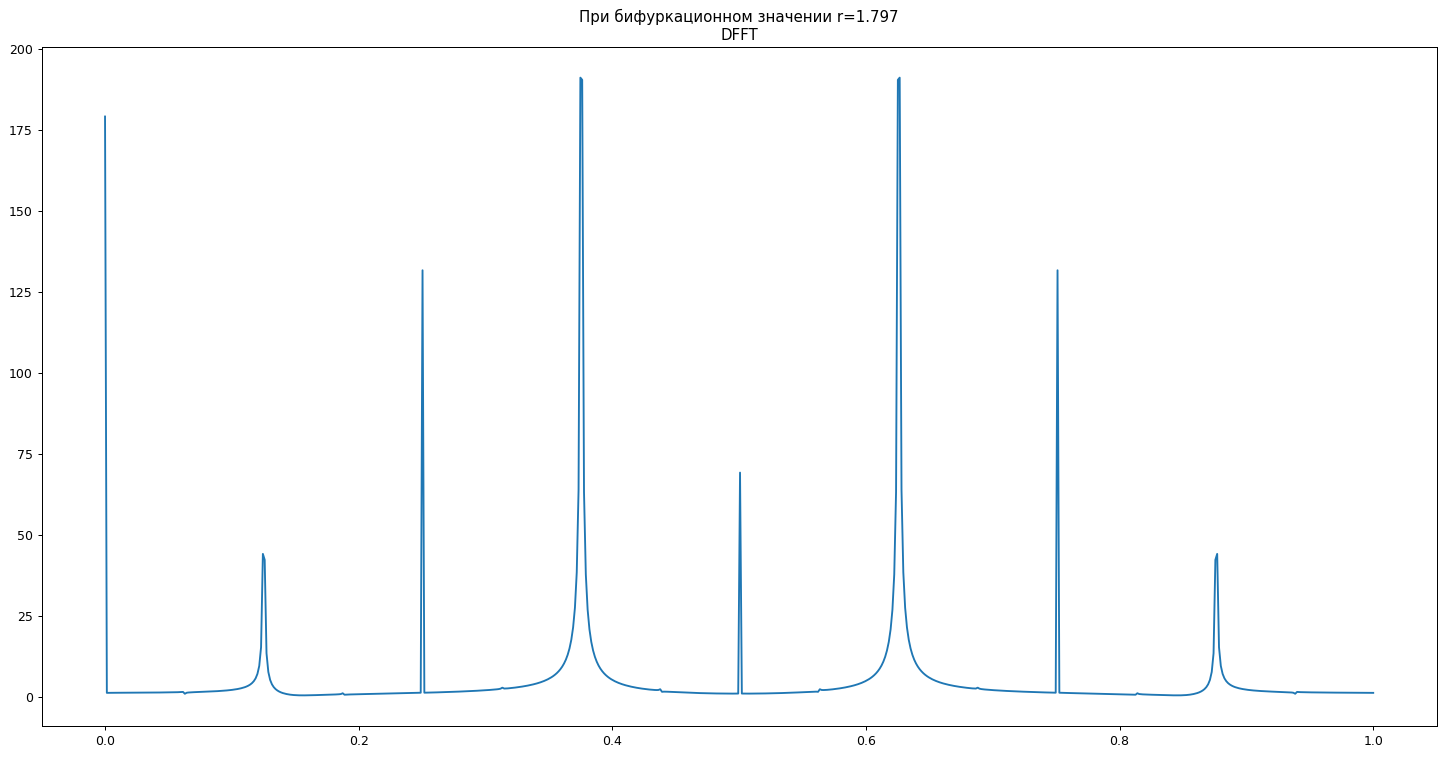

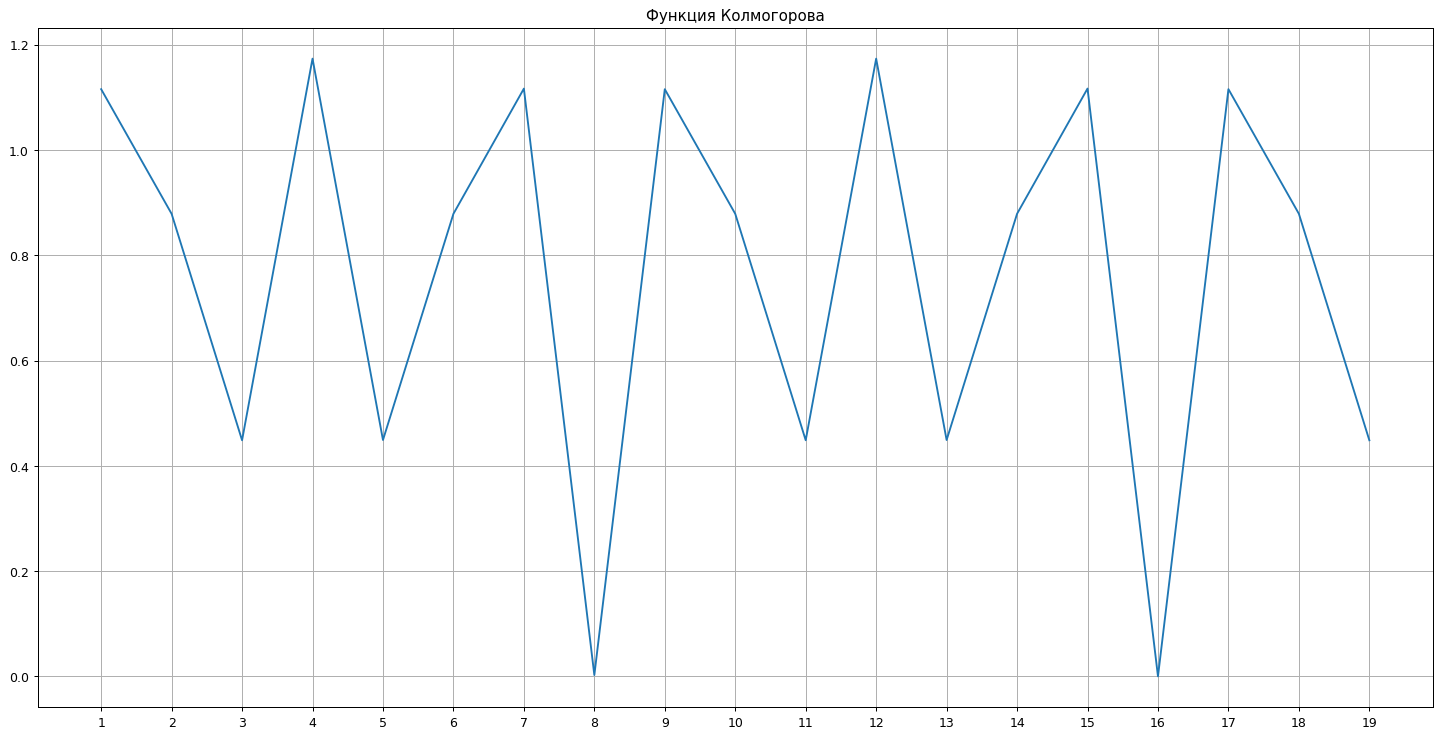

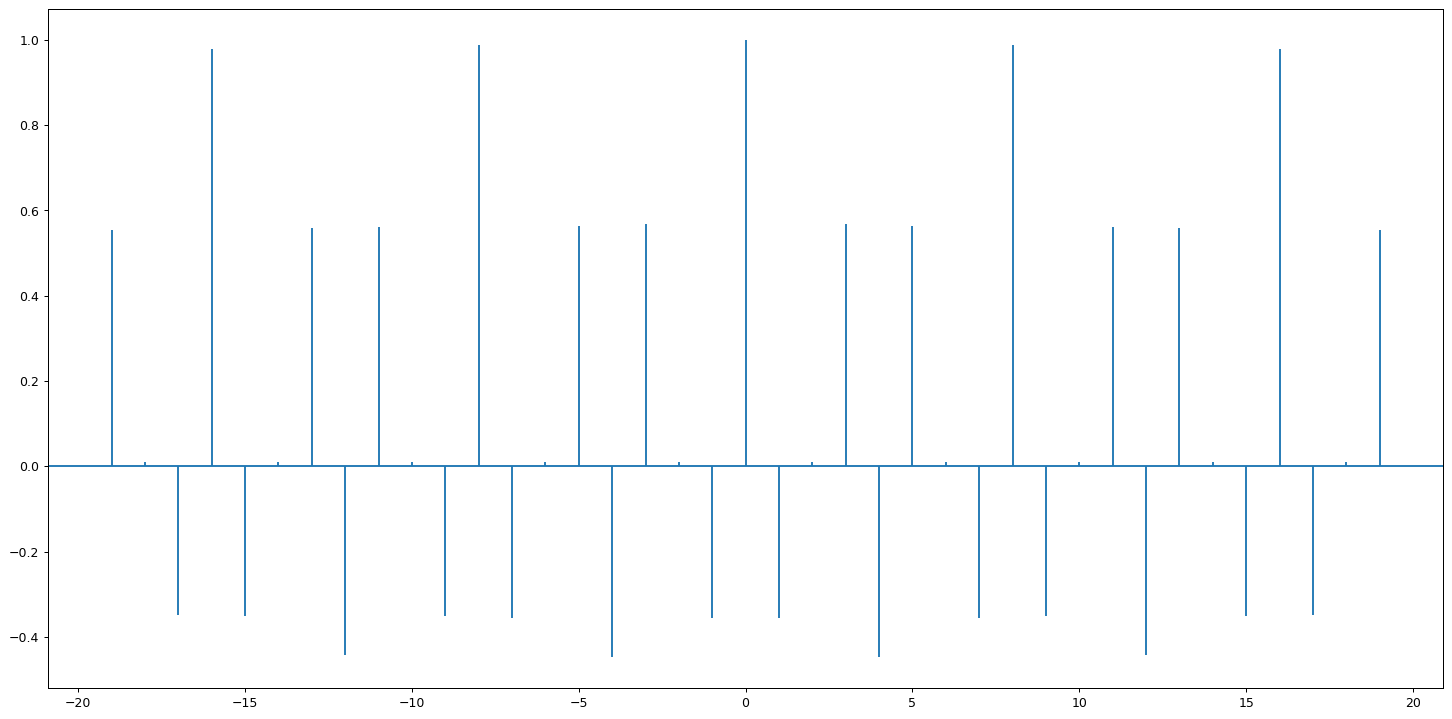

In [39]:
FTREE(delta = 0.001, quality=300, AL_quality = 400)